# STACKING ENSEMBLE LEARNING ML MODEL FOR AD DETECTION

In [14]:
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score

In [2]:
# Load your dataset
data = pd.read_csv('OneDrive - Staffordshire University/Chika Dissertation/data/adni/Individual dataset/ADNIMERGE_05Feb2024.csv')

# Calculate the number of missing values in each column
missing_values = data.isnull().sum()

# Filter out the columns which have missing values and their counts
missing_values_filtered = missing_values[missing_values > 0]

# Print the results
print(missing_values_filtered)


DX_bl         11
AGE            9
PTMARRY        1
APOE4        365
FDG        12728
           ...  
PTAU_bl     6338
FDG_bl      5201
PIB_bl     16267
AV45_bl     8585
FBB_bl     15322
Length: 98, dtype: int64


C:\Users\a040910m\AppData\Local\Temp\ipykernel_9608\1530205249.py:2: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('OneDrive - Staffordshire University/Chika Dissertation/data/adni/Individual dataset/ADNIMERGE_05Feb2024.csv')


In [5]:
data.describe()

,RID,SITE,AGE,PTEDUCAT,APOE4,FDG,PIB,AV45,FBB,CDRSB,...,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M
count,16421.000000,16421.000000,16412.000000,16421.000000,16056.000000,3693.000000,223.000000,3080.000000,513.000000,11747.000000,...,8915.000000,9085.000000,11220.000000,154.000000,7836.000000,1099.000000,16421.000000,16421.000000,16421.000000,16421.000000
mean,2899.082273,81.733329,73.214173,16.105779,0.516193,1.175624,1.783161,1.193030,1.175212,2.047927,...,1.735025,1.601863,1.226786,1.582256,1.186525,1.163109,2.738280,32.792027,32.712259,32.580903
std,2220.442824,132.762777,7.028099,2.762672,0.646953,0.167288,0.422511,0.230866,0.246133,2.866563,...,0.861453,0.670951,0.153364,0.302114,0.220110,0.236850,2.939675,35.203809,35.193789,35.124178
min,2.000000,2.000000,50.400000,4.000000,0.000000,0.566989,1.095000,0.809000,0.870200,0.000000,...,1.000000,1.000000,0.621933,1.155000,0.810000,0.870200,0.000000,0.000000,0.000000,0.000000
25%,751.000000,22.000000,68.500000,14.000000,0.000000,1.071700,1.361250,1.010075,0.996900,0.000000,...,1.000000,1.102560,1.134820,1.360000,1.012400,0.995100,0.506502,6.065570,6.000000,6.000000
50%,2308.000000,41.000000,73.200000,16.000000,0.000000,1.180590,1.850000,1.106800,1.054000,1.000000,...,1.500000,1.333330,1.234580,1.490000,1.098400,1.041700,1.960300,23.475400,24.000000,24.000000
75%,4707.000000,123.000000,78.100000,18.000000,1.000000,1.287080,2.127500,1.358425,1.350800,3.000000,...,2.000000,1.897440,1.331470,1.835000,1.346900,1.318600,4.010950,48.032800,48.000000,48.000000
max,7125.000000,941.000000,91.400000,20.000000,2.000000,1.776170,2.927500,2.686600,2.008800,18.000000,...,4.000000,3.948720,1.776170,2.282500,2.010100,1.909000,16.961000,203.115000,204.000000,204.000000


In [6]:
data.shape


(16421, 116)

In [8]:
selected_columns = data.iloc[:, [19, 20, 21, 50, 51, 104, 105, 106]]
selected_columns 

,ABETA,TAU,PTAU,FLDSTRENG,FSVERSION,ABETA_bl,TAU_bl,PTAU_bl
0,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,NaN,NaN,NaN
1,741.5,239.7,22.83,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,741.5,239.7,22.83
2,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,741.5,239.7,22.83
3,601.4,251.7,24.18,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,741.5,239.7,22.83
4,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,741.5,239.7,22.83
...,...,...,...,...,...,...,...,...
16416,NaN,NaN,NaN,NaN,NaN,995.8,174.4,17.82
16417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16418,NaN,NaN,NaN,NaN,NaN,1328,204.5,16.48
16419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

### Age

The age range you've mentioned, from 50.4 to 91.4 years, covers a broad spectrum of the adult and elderly population. This age range is particularly significant in studies related to aging, chronic diseases, neurodegenerative disorders, and other conditions that predominantly affect older adults. 

When considering research or data analysis within this age range, several factors or themes might be of interest:

1. **Aging and Longevity**: Understanding factors that contribute to healthy aging and longevity. This includes studying lifestyle factors, genetics, and the impact of chronic diseases.

2. **Neurodegenerative Diseases**: The prevalence of conditions such as Alzheimer's disease, Parkinson's disease, and other forms of dementia increases with age. Data from this age range can be crucial for understanding the epidemiology, progression, and risk factors associated with these disen3ions.

4. **Cognitive and Functional Decline**: With increasing age, there can be a decline in cognitive function and physical ability. Research can focus on mitigation, understanding the pace of decline, and distinguishing between normal aging and pathological po4ulations.

6. **Social and Psychological Aspects**: Aging is not solely a biological process; it also involves changes in social roles, psychological well-being, and quality of life. Studies may explore how aging affects mental health, social connections, and life satisfaction.

In research and data analysis, understanding the age distribution of participants is vital for interpreting results accurately and ensuring they are relevant to the populations most affected by the conditions under study. The age range of 50.4 to 91.4 years is particularly relevant for studying aspects of aging and associated health conditions, providing valuable insights into the challenges and opportunities of aging populations.

In [35]:
AGE_column = data[['AGE']]
unique_values = AGE_column['AGE'].unique()
print(unique_values)

[74.3 81.3 67.5 73.7 80.4 75.4 73.9 78.5 80.8 65.4 72.6 71.7 66.9 64.1
 83.3 76.9 76.8 73.2 70.9 72.8 68.5 76.2 85.8 85.9 84.7 77.6 66.5 80.1
 81.  75.5 69.6 80.2 77.3 70.1 70.  77.  71.8 74.5 74.4 72.9 74.  70.6
 78.  78.2 78.3 79.7 76.  85.  75.3 80.3 75.1 65.6 65.1 90.1 69.8 62.4
 77.2 70.7 79.6 84.4 73.6 70.3 87.3 60.7 82.6 75.8 75.2 78.4 72.  73.3
 77.5 73.1 86.3 65.9 81.1 79.2 59.7 74.1 77.9 64.9 79.1 72.5 89.3 71.9
 74.7 74.8 64.8 80.9 63.6 72.4 65.8 77.1 86.1 78.8 80.5 61.4 71.1 62.9
 84.3 83.6 67.4 82.4 80.  60.3 88.3 81.8 68.  73.8 71.3 78.6 85.5 67.1
 70.4 62.8 72.1 67.7 79.4 76.4 87.7 84.8 89.1 56.4 73.4 73.5 84.2 70.8
 82.7 78.1 82.8 71.5 70.2 68.3 76.6 64.6 69.9 83.4 76.1 68.4 70.5 71.6
 56.5 75.9 79.3 69.  79.8 72.3 71.2 84.6 86.2 84.  74.6 69.2 63.9 76.3
 77.8 82.2 61.3 75.6 80.6 62.7 81.9 72.7 54.4 82.9 83.1 86.6 56.1 64.4
 75.7 77.4 74.9 71.4 55.2 57.7 68.9 80.7 69.4 77.7 85.1 72.2 76.7 66.1
 68.7 64.2 60.1 86.5 71.  62.3 83.2 58.4 84.5 75.  86.7 82.5 67.2 61.
 62.  8

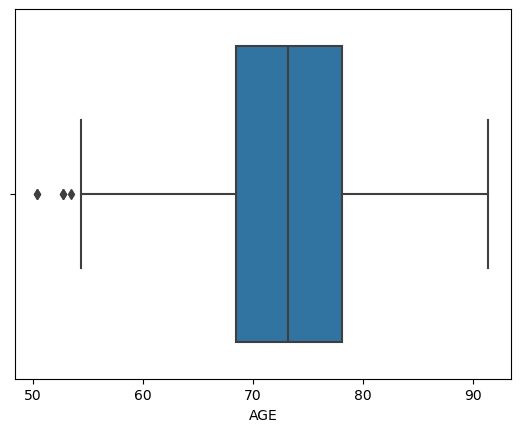

In [39]:
sns.boxplot(x=data['AGE'])
plt.show()

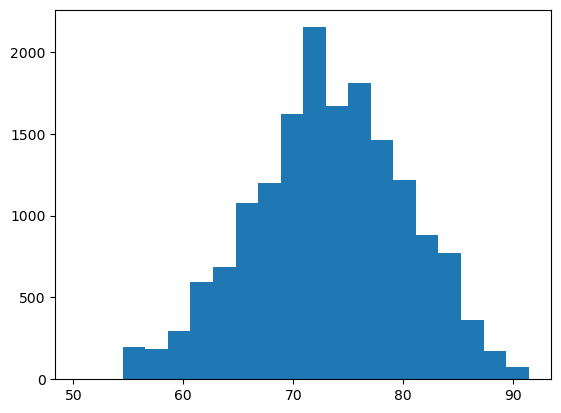

In [40]:
plt.hist(data['AGE'], bins=20)
plt.show()

In [12]:
# Median Imputation for demographic columns
median_columns = ['AGE'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

### Marital Status

The categorical data on marital status you provided gives a snapshot of the social and relational context of the participants in your dataset. Marital status is often collected in health and social science research because it can have significant implications for an individual's health, well-being, and social support networks. Here's how the different categories you mentioned can play a role in various aspects of research and analysis:

- **Married (12,524 participants)**: Being married can often mean having a built-in support system, which can influence health outcomes positively. Research has shown that married individuals may have better mental and physical health, lower mortality rates, and higher levels of well-being compared to their unmarried counterparts. However, the quality of the marriage is also a crucial factor in these outcomes.

- **Widowed (1,873 participants)**: Widowhood is associated with a significant increase in mortality risk and can have profound impacts on mental health, leading to conditions such as depression. It can also change social support dynamics and financial stability. Studies involving widowed individuals can provide insights into coping mechanisms, the importance of community and social support, and the effects of loss on health.

- **Divorced (1,414 participants)**: Divorce can be a stressful life event that affects mental and physical health. Divorced individuals may experience higher rates of depression, increased risk for certain diseases, and changes in socio-economic status. Research focusing on divorced participants can explore the long-term health effects of divorce, adaptation processes, and the effectiveness of support systems.

- **Never married (609 participants)**: Individuals who have never been married encompass a diverse group, including those who may prioritize career or personal freedom, as well as those who may have desired marriage but not found a partner. The health and well-being of never-married individuals can vary widely, influenced by factors such as social connections, economic stability, and personal choice. Studies can investigate how being never married affects health outcomes, social networks, and life satisfaction compared to their married or previously married peers.

Each of these marital statuses provides a unique perspective on the interplay between social relationships and health. Analyzing data with respect to marital status can uncover important health disparities, highlight the need for targeted interventions, and improve understanding of how social factors influence overall well-being.

In [13]:
# Mode Imputation for demographic columns
mode_columns = ['PTMARRY']  
mode_imputer = SimpleImputer(strategy='most_frequent') 
data[mode_columns] = mode_imputer.fit_transform(data[mode_columns])

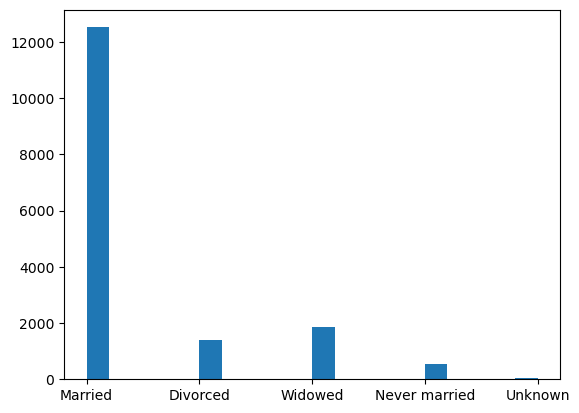

In [41]:
plt.hist(data['PTMARRY'], bins=20)
plt.show()

# Handling Missing Values in Genetic Markers and Biomarkers

## APOE (Apolipoprotein E)


The APOE ε4 allele is a variant of the APOE gene that is significantly associated with an increased risk of developing Alzheimer's disease, among other health conditions. APOE (Apolipoprotein E) plays a crucial role in lipid metabolism and is involved in the process of transporting cholesterol and other fats through the bloodstream. The APOE gene comes in several alleles, with ε2, ε3, and ε4 being the most common in the human population. ε3 is considered the "neutral" allele, while ε2 is sometimes associated with a lower risk of Alzheimer's disease, and ε4 with a higher risk.

The presence of APOE ε4 alleles in an individual can be determined through genetic testing. People can inherit one APOE allele from each parent, meaning they can have none, one, or two ε4 alleles:

- **0 ε4 alleles** indicate that the person did not inherit the ε4 allele from either parent, which generally means they have a lower risk of Alzheimer's disease compared to individuals with one or two ε4 alleles. Your data shows that 9,123 participants fall into this category.
- **1 ε4 allele** means the individual inherited the ε4 allele from one parent. This significantly increases the risk of developing Alzheimer's disease compared to individuals with no ε4 alleles. According to your data, 5,578 participants have one ε4 allele.
- **2 ε4 alleles** indicate inheritance of the ε4 allele from both parents, which greatly increases the risk of Alzheimer's disease compared to individuals with one or no ε4 alleles. In your dataset, 1,355 participants have two ε4 alleles.

It's important to note that while the presence of APOE ε4 alleles increases the risk of Alzheimer's disease, it is not a definitive predictor. Not all individuals with one or two ε4 alleles will develop Alzheimer's, and the disease can occur in those without any ε4 alleles, indicating the influence of other genetic, environmental, and lifestyle factors in the disease's development.

In [34]:
apoE4_column = data[['APOE4']]
unique_values = apoE4_column['APOE4'].unique()
unique_values

array([0., 1., 2.])

In [33]:
# Mode Imputation for demographic columns
mode_columns = ['APOE4']  
mode_imputer = SimpleImputer(strategy='most_frequent') 
data[mode_columns] = mode_imputer.fit_transform(data[mode_columns])

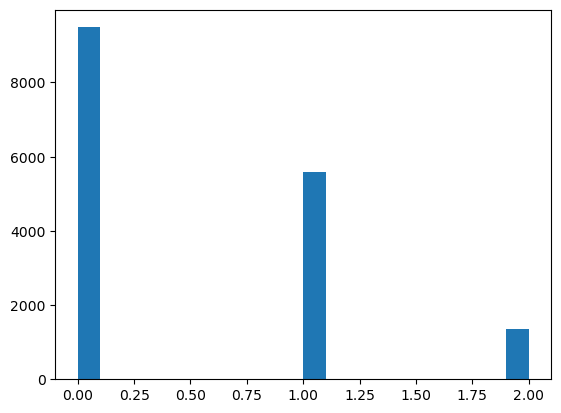

In [42]:
plt.hist(data['APOE4'], bins=20)
plt.show()

### FDG (Fluorodeoxyglucose)

The values of FDG (Fluorodeoxyglucose) in the context of FDG-PET (Positron Emission Tomography) scans, particularly relating to their Standard Uptake Value Ratios (SUVR), vary widely depending on several factors, including the purpose of the scan, the part of the body being examined, and the specific physiological or pathological conditions of the individual being assessed.

FDG is a radiotracer used in PET scans to measure glucose metabolism. Since cancer cells typically have a higher rate of glucose metabolism than normal cells, FDG-PET scans are often used in oncology to detect cancerous tumors. Similarly, FDG-PET scans can be used in neurology to assess brain activity and diagnose conditions like Alzheimer's disease, where certain brain regions may show decreased glucose metabolism.

The Standard Uptake Value (SUV) is a quantitative measure used to assess how much FDG has been absorbed by tissues in the body. The SUV ratio (SUVR) is a comparison of the SUV in a region of interest to the SUV in a reference region. This ratio helps to normalize the data and allows for comparison between scans.

In the real world, the "normal" range of FDG SUVR can differ significantly based on the target organ, the patient's condition, and even the specific protocols of the scanning facility. For instance, in neurology, certain ranges of SUVR might be considered normal for brain tissue, whereas in oncology, higher SUVR values might indicate tumor pretic tests.

In [29]:
FDG_column = data[['FDG']]
unique_values = FDG_column['FDG'].unique()
print(unique_values)

[1.33615  1.1086   1.07796  ... 1.13063  0.961923 1.17784 ]


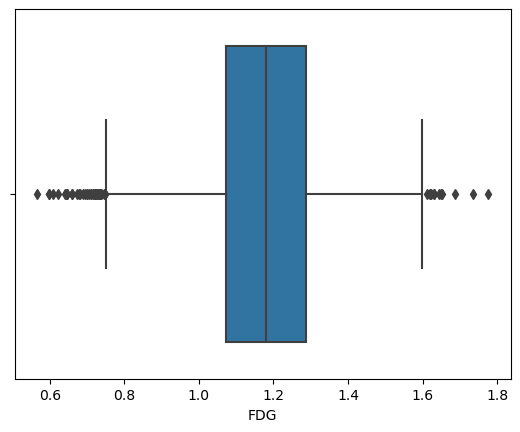

In [37]:
sns.boxplot(x=data['FDG'])
plt.show()


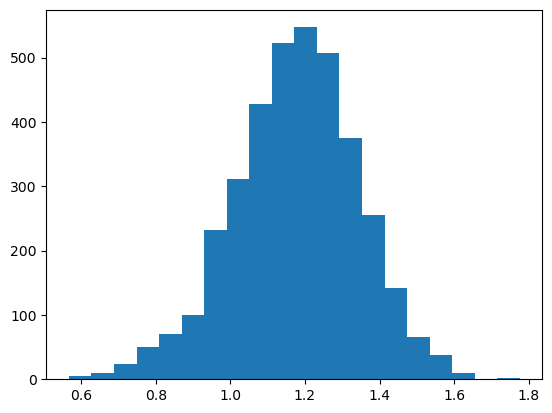

In [31]:
plt.hist(data['FDG'], bins=20)
plt.show()


#### Mean Imputation was used beacuae FDG is normally distributed without many outliers, mean imputation can be an effective way to handle missing values.

In [44]:
# Mean Imputation for FDG column
mean_columns = ['FDG']  
mean_imputer = SimpleImputer(strategy='mean') 
data[mean_columns] = mean_imputer.fit_transform(data[mean_columns])

### PiB-PET (Pittsburgh Compound B-Positron Emission Tomography)

PiB-PET (Pittsburgh Compound B-Positron Emission Tomography) scans are a specialized imaging technique used primarily in the study and diagnosis of Alzheimer's disease and other amyloid-related conditions. PiB is a radioactive tracer that binds specifically to amyloid-beta plaques, which are hallmark signs of Alzheimer's disease pathology in the brain. The scan measures the Standard Uptake Value Ratio (SUVR) of the tracer, providing a quantitative assessment of amyloid plaque accumulation.

The SUVR in PiB-PET scans is a relative measure, comparing the tracer uptake in specific brain regions (typically those known to accumulate amyloid plaques) against uptake in a reference region of the brain that is generally unaffected by the disease process. Higher SUVR values indicate greater amyloid deposition.

theyour dataset, the range of SUVR values for PiB-PET scans is from 1.095 to 2.9275. This range can be interpreted as follows:

- **Minimum Value (1.095):** This is the lowest SUVR valthen your dataset, indicating the lowest level of amyloid-beta plaque accumulation observed among the participants scanned. While this value suggests some accumulation of amyloid plaques, it is relatively low. Depending on the context of the study and the population being examined, such a level might be considered within normal limits, especially in older adults, as some amyloid deposition can occur with normal aging.

- **Maximum Value (2.9275):** This represents the highest level of amyloid-beta plaque accumulation detected in the dataset. Such a high SUVR value strongly indicates a significant presence of amyloid plaques, which is consistent with the pathology seen in Alzheimer's disease and other amyloidosis disorders. Participants with SUVR values at this end of the spectrum are likely to be either symptomatic for Alzheimer's disease or at high risk of developing symptoms.

The range and distribution of SUVR thees in your dataset could provide valuable insights into the prevalence and severity of amyloid pathology among the participants. It's searchers to consider these values in conjunction with other diagnostic information, clinical assessments, and biomarkers to fully understand the implications for disease progression, diagnosis, and potential therapeutic interventions.

In [55]:
PIB_column = data[['PIB']]
unique_values = PIB_column['PIB'].unique()
print(unique_values)

[1.85   2.3575 2.1275 2.0725 2.19   2.27   2.3525 1.6725 2.1825 2.21
 2.2475 1.215  1.1575 1.13   1.165  2.1075 1.9525 1.115  1.2    1.98
 1.9175 2.07   2.315  1.71   1.6325 1.715  1.675  1.5825 1.5175 1.1775
 1.1325 1.255  1.58   2.035  2.0025 1.7075 1.765  1.905  1.8475 2.9275
 1.3    1.245  1.12   1.195  2.1    2.265  2.3375 1.265  1.33   2.36
 2.185  2.115  2.0275 1.87   2.3175 2.0375 1.3075 1.2825 1.2925 2.045
 2.075  2.2125 1.975  1.825  2.475  2.135  1.2175 1.2225 1.97   1.43
 1.4625 2.155  1.835  2.025  2.13   1.93   1.7175 1.2275 2.08   1.57
 1.9375 1.86   2.0875 2.205  2.3    2.6375 2.2825 2.3075 2.31   2.39
 1.49   1.34   1.3425 2.335  1.735  1.7375 2.255  2.22   1.665  1.18
 1.1675 1.3625 2.0425 1.5675 1.435  1.32   1.335  1.2775 2.1375 2.385
 1.9025 2.2325 2.285  1.815  1.3775 1.645  2.1475 1.22   1.1025 1.2325
 1.59   1.8525 2.0475 1.83   1.7525 1.91   1.685  1.7125 2.4    1.2525
 1.8825 1.8425 1.095  1.8575 1.355  1.56   1.145  1.1125 1.225  2.44
 1.415  1.8675 2.2375 1.

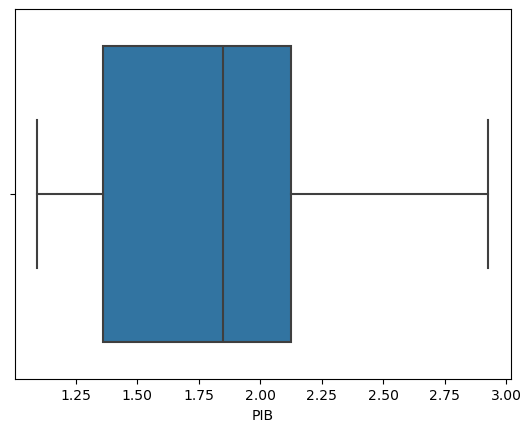

In [50]:
sns.boxplot(x=data['PIB'])
plt.show()

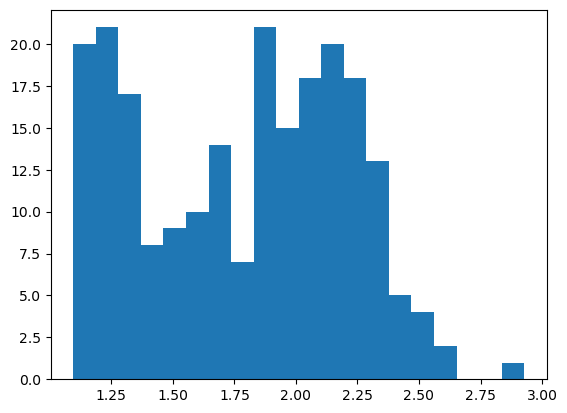

In [51]:
plt.hist(data['PIB'], bins=20)
plt.show()

In [52]:
# Median Imputation for PIB
median_columns = ['PIB'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

### AV-45 PET scans, also known as Florbetapir (18F) PET scans

AV-45 PET scans, also known as Florbetapir (18F) PET scans, are used to visualize amyloid-beta plaques in the brain, similar to PiB-PET scans. These plaques are a characteristic feature of Alzheimer's disease and some other forms of dementia. The AV-45 compound binds to amyloid plaques, allowing their detection and quantification through positron emission tomography (PET). The Standard Uptake Value Ratio (SUVR) is used to quantify the accumulation of amyloid plaques, with higher values indicating greater plaque density.

The range of SUVR valued, from 0.809 to 2.6866, encompasses the minimum and maximum levels of amyloid-beta plaque detected itheur dataset via AV-45 PET scans
- **Maximum Value (0.809)** 9):** This represents the lowest level of amyloid-beta plaque accumulation detected in the dataset. An SUVR near this lower end could suggest a minimal presence of amyloid plaques, which might be consistent with either a normal aging process in some individuals or the early/preclinical stages of amyloid-related pathology. It's important to note that a low level of amyloid deposition does not necessarily rule out the presence of cognitive impairment or dementia, as other pathologies can also contribute.

- **Maximum Value (2.6866):** This is the highest SUVR value observed, indicating a significant accumulation of amyloid-beta plaques. Values towards this end of the spectrum are strongly associated with Alzheimer's disease pathology. Individuals with such high SUVR values are likely to have Alzheimer's disease or be at a very high risk of developing it. It's critical, however, to interpret these results in conjunction with clinical assessments, as amyloid deposition is necessary but not solely sufficient for an Alzheimer's disease diagnosis.

The range of SUVR values for AV-45 scans in your dataset highlights the variability in amyloid deposition among individuals. This variability underscores the importance of using amyloid PET scans in combination with other diagnostic tools and clinical evaluations to accurately diagnose Alzheimer's disease and differentiate it from other forms of dementia. Moreover, these SUVR values can be crucial for research purposes, aiding in the stratification of participants for studies investigating the pathophysiology of Alzheimer's disease, the efficacy of anti-amyloid treatments, and the relationship between amyloid deposition and cognitive decline.

In [57]:
AV45_column = data[['AV45']]
unique_values = AV45_column['AV45'].unique()
print(unique_values)

[   nan 1.3496 0.9804 ... 0.9558 1.1368 1.2086]


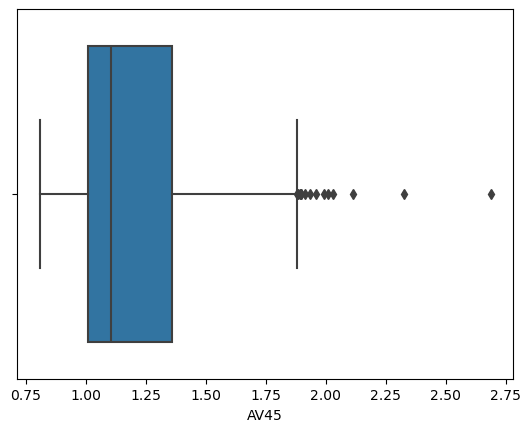

In [58]:
sns.boxplot(x=data['AV45'])
plt.show()

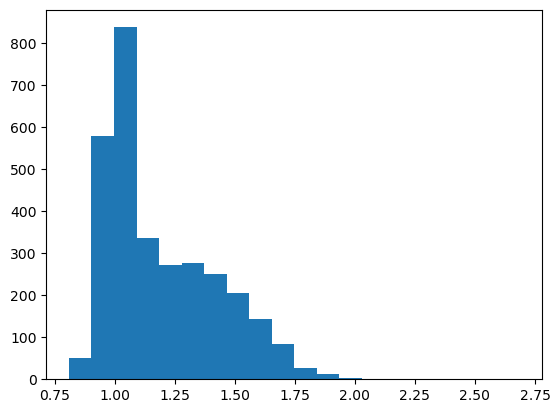

In [59]:
plt.hist(data['AV45'], bins=20)
plt.show()

In [60]:
# Median Imputation for PIB
median_columns = ['AV45'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

### FBB-PET scans

FBB-PET scans, using Florbetaben (18F) as the radiotracer, are another method for detecting amyloid-beta plaques in the brain, a hallmark of Alzheimer's disease and other amyloidosis-related conditions. Similar to PiB-PET and AV-45 PET scans, FBB-PET scans allow for the visualization and quantification of amyloid plaques through the use of positron emission tomography (PET). The Standard Uptake Value Ratio (SUVR) is calculated to assess the density of amyloid plaques, with higher SUVR values indicating a higher concentration of plaques.

The range of SUVR values from 0.8702 to 2.0088 that you've provided for FBB-PET scans itheur dataset reflects the minimum and maximum levels of amyloid-beta plaque accumulation detected among the participants:

- **Minimum Value (0.8702):** This lower end of the SUVR range suggests a relatively low level of amyloid plaque accumulation. Such levels might be found in individuals in the early stages of amyloid pathology or even in some healthy older adults, as the presence of some amyloid plaques does not necessarily indicate Alzheimer's disease. It's crucial, however, to interpret these values in the context of other diagnostic information and clinical evaluations to understand their significance fully.

- **Maximum Value (2.0088):** This is the highest SUVR value in your dataset, indicating a significant presence of amyloid plaques. Values at this higher end are more suggestive of Alzheimer's disease pathology. Participants with such SUVR levels are likely experiencing or are at a high risk of developing cognitive impairment associated with Alzheimer's disease. Again, the clinical context, including symptomatology and other biomarkers, is essential for a comprehensive diagnosis.

The SUVR values for FBB-PET scans provide critical information for diagnosing Alzheimer's disease, understanding its progression, and potentially stratifying participants for research studies. The relatively narrower range of these values, compared to some other amyloid tracers, may reflect the specific properties of Florbetaben in detecting amyloid plaques or differences in the populations being studied. It highlights the importance of multimodal approaches in diagnosing Alzheimer's disease, considering the complex nature of its pathology and the overlap with other neurodegenerative conditions.

In [63]:
FBB_column = data[['FBB']]
unique_values = FBB_column['FBB'].unique()
print(unique_values)

[   nan 1.0714 1.0372 0.9902 0.9959 0.9602 1.0225 1.0683 0.9846 0.9642
 0.996  1.1682 0.9212 1.396  1.8348 0.9599 0.958  1.0345 1.4427 0.9906
 1.6525 1.1832 1.5838 1.2899 1.0332 1.1005 1.4437 1.2001 0.919  1.077
 0.9813 1.4008 0.9699 1.0468 0.9851 1.3686 0.9343 0.9536 1.1242 1.909
 1.0218 1.0646 1.0446 1.3185 1.0572 1.8488 1.4979 0.9472 1.1127 1.1894
 1.1441 1.0161 1.1983 1.0766 1.0205 1.343  1.5291 1.119  1.0189 1.0002
 1.355  1.5042 0.9768 0.9927 1.0402 1.3774 1.0126 1.0561 1.0805 1.0191
 1.0696 1.0532 1.0495 0.9534 1.4404 0.9573 1.0564 1.0035 1.4981 1.5078
 0.9596 1.0104 1.0378 1.6008 1.034  1.0003 1.0754 1.0354 1.017  1.5036
 1.0201 1.6675 1.0864 0.9611 0.9951 1.1105 0.9561 0.9577 0.9981 1.0025
 0.9865 0.9692 1.0287 1.0253 1.3995 1.7712 1.4786 0.9629 1.0027 1.0065
 1.0195 1.3913 1.4938 1.0406 1.0335 1.0041 0.9991 1.43   0.956  1.5019
 1.0217 1.0947 1.1233 1.182  1.0188 1.0267 1.0367 1.0395 1.0891 1.1566
 1.2286 1.2177 1.0322 1.0767 1.0167 1.2456 1.184  1.2191 1.0144 1.0094
 1.0837 

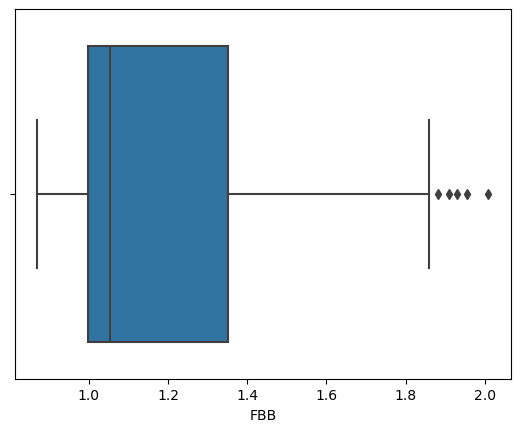

In [64]:
sns.boxplot(x=data['FBB'])
plt.show()

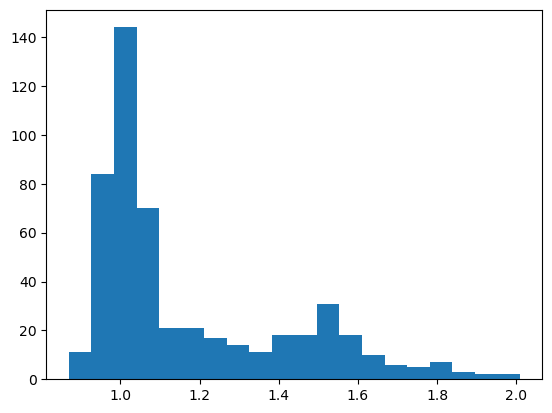

In [65]:
plt.hist(data['FBB'], bins=20)
plt.show()

In [66]:
# Mean Imputation for FDG column
mean_columns = ['FBB']  
mean_imputer = SimpleImputer(strategy='mean') 
data[mean_columns] = mean_imputer.fit_transform(data[mean_columns])

### Beta-amyloid 1-42 (Aβ1-42)

The levels of beta-amyloid 1-42 (Aβ1-42) in the cerebrospinal fluid (CSF) are a crucial biomarker for Alzheimer's disease and other forms of dementia associated with amyloid plaque deposition. Beta-amyloid peptides, particularly Aβ1-42, are known to aggregate and form plaques in the brain, a hallmark pathological feature of Alzheimer's disease. The measurement of Aβ1-42 in CSF provides insight into the pathological processes occurring in the brain, with lower levels of Aβ1-42 in the CSF being indicative of increased plaque deposition in the brain tissue.

The range of Aβ1-42 levels, from 203.0 to 1697.0 pg/mL, covers a broad spectrum:

- **Minimum Value (203.0 pg/mL):** This represents the lower end of the Aβ1-42 levels in the dataset. Lower levels of Aβ1-42 in the CSF are associated with significant amyloid deposition in the brain, consistent with the Alzheimer's disease pathology. Individuals with Aβ1-42 levels around this minimum value are likely to have a higher burden of amyloid plaques, which is a diagnostic criterion for Alzheimer's disease, especially when corroborated with clinical symptoms and potentially other biomarkers such as tau proteins.

- **Maximum Value (1697.0 pg/mL):** This is the highest level of Aβ1-42 detected in the dataset. Higher levels of Aβ1-42 in the CSF are generally considered normal or indicative of a lower likelihood of significant amyloid plaque burden in the brain. It suggests that Alzheimer's disease pathology may not be as advanced, or it could be absent, particularly if other diagnostic indicators support this conclusion.

It's important to note that while CSF Aβ1-42 levels provide valuable information about amyloid pathology, the diagnosis of Alzheimer's disease is multifaceted. It typically involves a combination of clinical assessment, neuropsychological testing, imaging studies, and evaluation of additional biomarkers, including CSF total tau and phosphorylated tau, as well as imaging biomarkers like those obtained from PET scans.

Furthermore, the interpretation of Aβ1-42 levels can be influenced by various factors, including the assay method used, the individual's age, and the presence of other neurological conditions. As such, these levels should always be interpreted within the broader context of comprehensive diagnostic evaluations and criteria.

In [69]:
ABETA_column = data[['ABETA']]
unique_values = ABETA_column['ABETA'].unique()
print(unique_values)

[nan 741.5 601.4 ... '690.2' '708.3' '617.8']


#### We encountered error, some values in ABETA columns contains ">" and "<"symbols, which make the column to contain string and float values. These values needs to be converted to float to enable our EDA and further analysis. 

In [72]:
# Filter rows where 'column' contains '>'
filtered_data = data[data['ABETA'].str.contains('>', na=False)]

# Display the filtered data
print(filtered_data)


        RID COLPROT ORIGPROT        PTID  SITE VISCODE    EXAMDATE DX_bl  \
11250     8   ADNI1    ADNI1  011_S_0008    11      bl  2005-09-19    CN   
11252     8   ADNI1    ADNI1  011_S_0008    11     m12  2006-09-19    CN   
11264    19   ADNI1    ADNI1  067_S_0019    67      bl  2005-11-23    CN   
11266    19   ADNI1    ADNI1  067_S_0019    67     m12  2006-12-08    CN   
11270    22   ADNI1    ADNI1  011_S_0022    11      bl  2005-10-19    CN   
...     ...     ...      ...         ...   ...     ...         ...   ...   
12767  5266   ADNI2    ADNI2  127_S_5266   127     m24  2015-08-06   SMC   
12768  5271   ADNI2    ADNI2  036_S_5271    36      bl  2013-08-06   SMC   
12771  5272   ADNI2    ADNI2  053_S_5272    53      bl  2013-09-04   SMC   
12774  5287   ADNI2    ADNI2  053_S_5287    53      bl  2013-09-18   SMC   
12776  5288   ADNI2    ADNI2  027_S_5288    27      bl  2013-09-25   SMC   

        AGE PTGENDER  ...  PTAU_bl   FDG_bl PIB_bl AV45_bl  FBB_bl  Years_bl  \
11250  

In [74]:
# Replace '>' with an empty string and convert to float
data['ABETA'] = data['ABETA'].str.replace('>', '')
data['ABETA'] = data['ABETA'].str.replace('<', '')

# Convert the entire column to float
data['ABETA'] = data['ABETA'].astype(float)


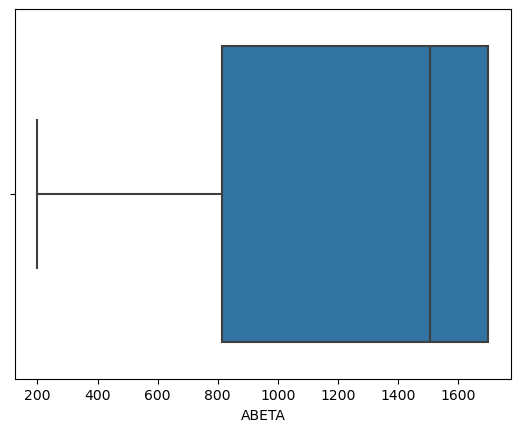

In [77]:
sns.boxplot(x=data['ABETA'])
plt.show()

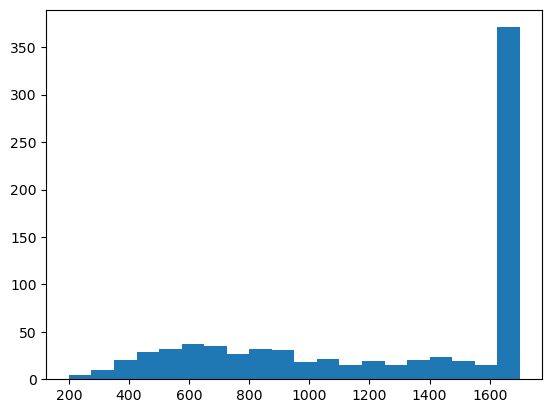

In [75]:
plt.hist(data['ABETA'], bins=20)
plt.show()

In [78]:
# Median Imputation for ABETA
median_columns = ['ABETA'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

### Total tau (T-tau) levels in the cerebrospinal fluid (CSF)

Total tau (T-tau) levels in the cerebrospinal fluid (CSF) are an important biomarker for neurodegeneration, widely used in the context of Alzheimer's disease and other neurodegenerative conditions. Tau is a protein that stabilizes microtubules in neurons, and when it becomes abnormally phosphorylated, it can form tangles inside neurons, contributing to neurodegeneration. Elevated levels of T-tau in the CSF are indicative of neuronal damage and loss, which are characteristic of Alzheimer's disease and other tauopathies.

The range of T-tau levels, from 80.16 to 915.8 pg/mL, represents the span of T-tau concentrations in your dataset:

- **Minimum Value (80.16 pg/mL):** This value is at the lower end of the T-tau level range in the dataset. Lower levels of T-tau in the CSF may be considered normal or indicative of minimal neurodegeneration. It is essential to compare these levels against normative data and consider them in conjunction with other clinical and biomarker findings to accurately interpret their significance.

- **Maximum Value (915.8 pg/mL):** This value represents the highest level of T-tau in the dataset, indicating significant neuronal damage and neurodegeneration. High levels of T-tau in the CSF are a strong biomarker for diseases characterized by neurodegeneration, such as Alzheimer's disease. However, elevated T-tau levels are not specific to Alzheimer's disease and can be observed in other neurological conditions; thus, they should be evaluated in the context of other diagnostic indicators, including clinical assessment and additional biomarkers like Aβ1-42 and phosphorylated tau (P-tau) levels.

It's important to note that the interpretation of T-tau levels must consider the clinical context, including symptoms, disease progression, and other diagnostic tests. T-tau levels are typically part of a panel of CSF biomarkers used to assess the likelihood of Alzheimer's disease or other neurodegenerative conditions, in conjunction with neuroimaging findings and cognitive assessments. The combined evaluation of these biomarkers enhances the accuracy of diagnoses and helps differentiate among various forms of dementia and neurodegenerative diseases.

In [80]:
TAU_column = data[['TAU']]
unique_values = TAU_column['TAU'].unique()
print(unique_values)

[nan 239.7 251.7 ... '81.54' '80.16' '97.31']


In [85]:
# Filter rows where 'column' contains '>'
filtered_data = data[data['TAU'].str.contains('>', na=False)]

# Display the filtered data
print(filtered_data)

       RID COLPROT ORIGPROT        PTID  SITE VISCODE    EXAMDATE DX_bl   AGE  \
12781  590   ADNI1    ADNI1  016_S_0590    16      bl  2006-07-18  LMCI  78.1   

      PTGENDER  ...  PTAU_bl   FDG_bl PIB_bl AV45_bl  FBB_bl  Years_bl  \
12781   Female  ...     >120  1.07517    NaN     NaN     NaN       0.0   

       Month_bl  Month  M           update_stamp  
12781       0.0      0  0  2023-07-07 04:59:45.0  

[1 rows x 116 columns]


In [86]:
# Replace '>' with an empty string and convert to float
data['TAU'] = data['TAU'].str.replace('>', '')
data['TAU'] = data['TAU'].str.replace('<', '')

# Convert the entire column to float
data['TAU'] = data['TAU'].astype(float)


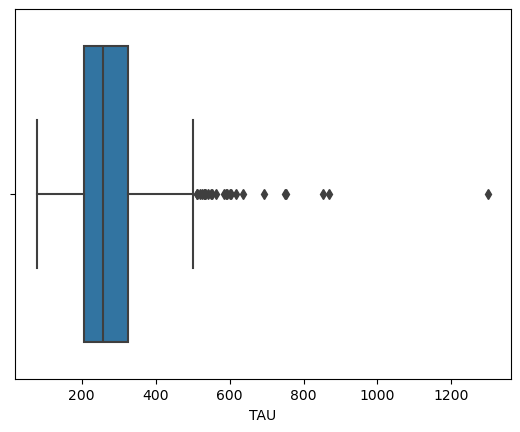

In [87]:
sns.boxplot(x=data['TAU'])
plt.show()

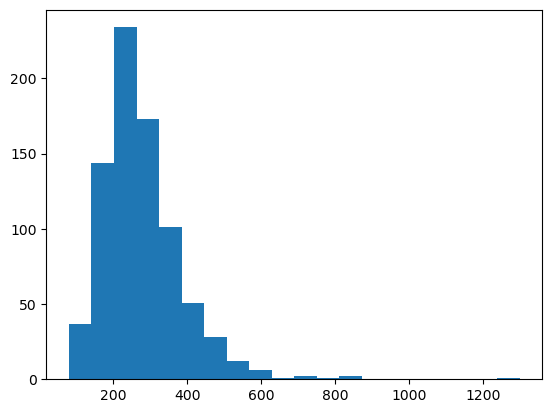

In [88]:
plt.hist(data['TAU'], bins=20)
plt.show()

In [89]:
# Median Imputation for TAU
median_columns = ['TAU'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Phosphorylated tau (pTau)

Phosphorylated tau (pTau) in the cerebrospinal fluid (CSF) serves as a specific biomarker for Alzheimer's disease-related neurodegeneration. Tau protein, when phosphorylated, plays a critical role in the formation of neurofibrillary tangles, one of the hallmark pathological features of Alzheimer's disease. Elevated levels of pTau in the CSF are indicative of ongoing neurodegenerative processes characteristic of Alzheimer's disease, distinguishing it from other forms of dementia and neurodegenerative conditions.

The range of pTau levels, from 8.21 to 103.7 pg/mL, reflects the diversity in the degree of Alzheimer's disease pathology among individuals in your dataset:

- **Minimum Value (8.21 pg/mL):** This represents the lowest level of pTau found in the dataset. Lower levels of pTau are generally observed in individuals without significant Alzheimer's disease pathology. However, the presence of pTau at any level can indicate some degree of tau pathology, and even lower levels might be clinically relevant depending on the context, such as in very early or preclinical stages of Alzheimer's disease.

- **Maximum Value (103.7 pg/mL):** This is the highest level of pTau detected, signifying a significant presence of neurofibrillary tangles and, consequently, a strong indication of Alzheimer's disease pathology. High pTau levels are associated with more advanced neurodegeneration and can correlate with disease severity and cognitive decline. It's crucial to interpret these levels in conjunction with other diagnostic information, including clinical evaluations and additional biomarkers like total tau (T-tau) and beta-amyloid 1-42 levels.

pTau levels provide valuable insight into the specific neurodegenerative processes associated with Alzheimer's disease. Their interpretation, particularly in relation to other CSF biomarkers and clinical assessments, can help in the diagnosis, understanding of disease progression, and potentially in the monitoring of treatment responses in Alzheimer's disease. The combination of pTau with other biomarkers enhances diagnostic accuracy and aids in differentiating Alzheimer's disease from other neurodegenerative disorders.

In [8]:
PTAU_column = data[['PTAU']]
unique_values = PTAU_column['PTAU'].unique()
print(unique_values)

[nan 22.83 24.18 ... '26.59' '>120' '<8']


In [92]:
# Filter rows where 'column' contains '>'
filtered_data = data[data['PTAU'].str.contains('>', na=False)]

# Display the filtered data
print(filtered_data)

       RID COLPROT ORIGPROT        PTID  SITE VISCODE    EXAMDATE DX_bl   AGE  \
12781  590   ADNI1    ADNI1  016_S_0590    16      bl  2006-07-18  LMCI  78.1   

      PTGENDER  ...  PTAU_bl   FDG_bl PIB_bl AV45_bl  FBB_bl  Years_bl  \
12781   Female  ...     >120  1.07517    NaN     NaN     NaN       0.0   

       Month_bl  Month  M           update_stamp  
12781       0.0      0  0  2023-07-07 04:59:45.0  

[1 rows x 116 columns]


In [94]:
# Filter rows where 'column' contains '>'
filtered_data = data[data['PTAU'].str.contains('<', na=False)]

# Display the filtered data
print(filtered_data)

        RID COLPROT ORIGPROT        PTID  SITE VISCODE    EXAMDATE DX_bl  \
12782   691   ADNI1    ADNI1  131_S_0691   131      bl  2006-07-25    AD   
12784   691   ADNI1    ADNI1  131_S_0691   131     m12  2007-07-26    AD   
12785   692   ADNI1    ADNI1  094_S_0692    94      bl  2006-08-11    CN   
12791   876   ADNI1    ADNI1  109_S_0876   109      bl  2006-10-05    CN   
12792  1276   ADNI1    ADNI1  013_S_1276    13      bl  2007-03-23    CN   
12794  1276   ADNI1    ADNI1  013_S_1276    13     m12  2008-04-08    CN   
12796  1276   ADNI1    ADNI1  013_S_1276    13     m24  2009-03-31    CN   
12798  1276   ADNI1    ADNI1  013_S_1276    13     m36  2010-04-20    CN   
12799  4021   ADNI2    ADNI2  031_S_4021    31      bl  2011-05-05    CN   
12804  4021   ADNI2    ADNI2  031_S_4021    31     m24  2013-05-06    CN   
12806  4806   ADNI2    ADNI2  123_S_4806   123     m24  2014-08-26  LMCI   

        AGE PTGENDER  ...  PTAU_bl    FDG_bl PIB_bl AV45_bl  FBB_bl  Years_bl  \
12782 

In [95]:
# Replace '>' with an empty string and convert to float
data['PTAU'] = data['PTAU'].str.replace('>', '')
data['PTAU'] = data['PTAU'].str.replace('<', '')

# Convert the entire column to float
data['PTAU'] = data['PTAU'].astype(float)

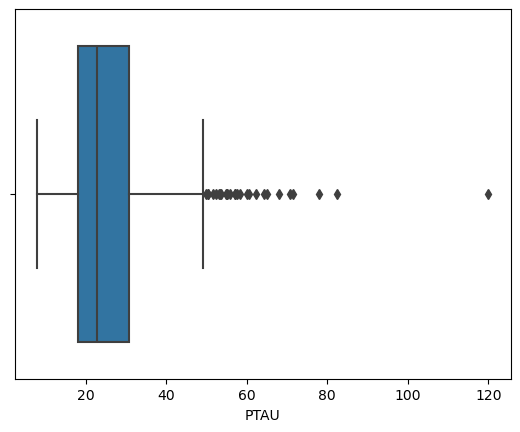

In [97]:
sns.boxplot(x=data['PTAU'])
plt.show()

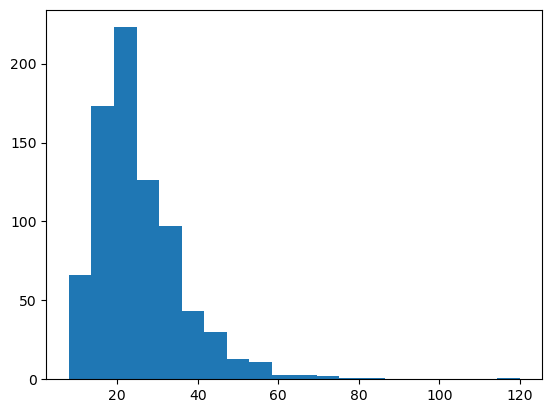

In [98]:
plt.hist(data['PTAU'], bins=20)
plt.show()

In [99]:
# Median Imputation for PTAU
median_columns = ['PTAU'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Ventricles

The volumetric measures of the ventricles, as reported in your dataset ranging from a minimum of 5,650 mm³ to a maximum of 162,729 mm³, provide significant insights into brain health and potential pathological conditions. The ventricles are fluid-filled cavities within the brain where cerebrospinal fluid (CSF) is produced and circulated. Volumetric measurements of these structures through Magnetic Resonance Imaging (MRI) can be critical for diagnosing and monitoring various neurological conditions.

- **Minimum Volume (5,650 mm³):** This represents the smallest ventricular volume itheur dataset. Smaller ventricular sizes can be considered normal, depending on the individual's age, brain size, and other factors. It's important to interpret these volumes in a clinical context, as significantly small ventricles are not typically a concern unless associated with other abnormal findings or symptoms.

- **Maximum Volume (162,729 mm³):** This indicates the largest ventricular volume recorded in the dataset. Significantly enlarged ventricles, a condition known as ventriculomegaly, can be indicative of several neurological conditions. Enlargement of the ventricles is often associated with brain atrophy in conditions such as Alzheimer's disease, hydrocephalus (an accumulation of CSF leading to increased pressure inside the skull), and other forms of dementia or brain damage. Enlarged ventricles can lead to increased intracranial pressure, potentially causing headaches, vision problems, and other neurological symptoms.

The range of ventricular volumes in your dataset highlights the diversity of brain structures among individuals and underscores the importance of considering these measurements within the broader context of clinical assessment and other diagnostic tests. In neurological and neurodegenerative disease research, volumetric MRI measures like these are invaluable for assessing disease progression, understanding the relationship between brain structure changes and cognitive/functional decline, and evaluating the efficacy of therapeutic interventions.

In [104]:
Ventricles_column = data[['Ventricles']]
unique_values = Ventricles_column['Ventricles'].unique()
print(unique_values)

[118233.   84599.   88580.  ...  38172.6  25142.9  45629.9]


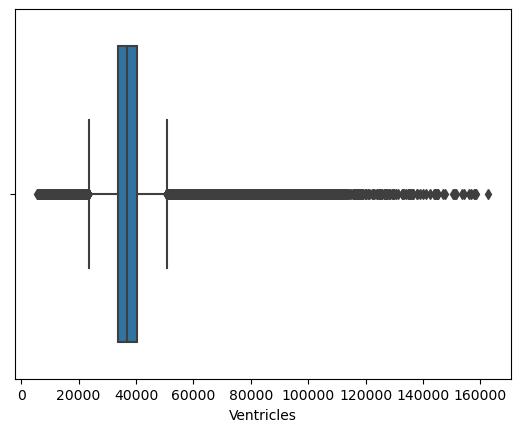

In [105]:
sns.boxplot(x=data['Ventricles'])
plt.show()

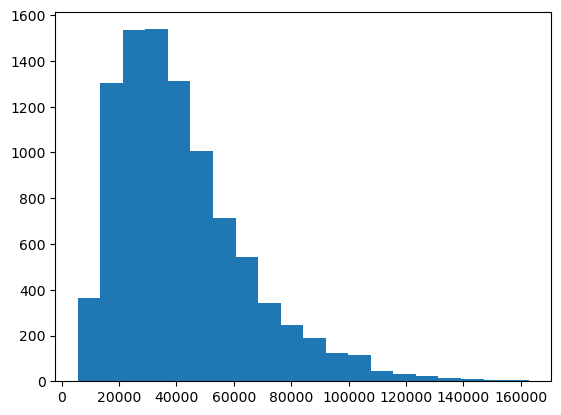

In [102]:
plt.hist(data['Ventricles'], bins=20)
plt.show()

In [103]:
# Median Imputation for Ventricles
median_columns = ['Ventricles'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Hippocampus

The volumetric measures for the hippocampus, with a range from 2,219 mm³ to 11,207 mm³ as reported in your dataset, offer crucial insights into brain health, especially in the context of memory function and neurodegenerative diseases. The hippocampus is a critical structure for memory formation and spatial navigation, and its volume can be indicative of various neurological conditions.

- **Minimum Volume (2,219 mm³):** This represents the smallest recorded volume of the hippocampus in the dataset. A reduced hippocampal volume can be a marker of neurodegeneration, commonly observed in conditions such as Alzheimer's disease, and is associated with cognitive impairments, particularly in memory. Lower volumes may also be seen in other conditions like severe stress, depression, or epilepsy, which can impact hippocampal integrity.

- **Maximum Volume (11,207 mm³):** This indicates the largest hippocampal volume within the dataset. While larger hippocampal volumes are generally considered within the range of normal variation, significantly larger volumes can sometimes be associated with specific cognitive strengths or certain neurological conditions, though this is less commonly a point of clinical concern compared to reduced volumes.

The variation in hippocampal volumes across individuals in your dataset underscores the importance of context when interpreting these measures. In neurology and psychiatry research, hippocampal volume is a key biomarker for studying cognitive health, aging, and the impact of therapeutic interventions on neurodegenerative diseases. For accurate diagnosis and monitoring of diseases like Alzheimer's, volumetric measurements of the hippocampus are often considered alongside other clinical assessments, cognitive tests, and additional biomarkers to provide a comprehensive understanding of an individual's neurological health.

In [106]:
Hippocampus_column = data[['Hippocampus']]
unique_values = Hippocampus_column['Hippocampus'].unique()
print(unique_values)

[8336.  5319.  5446.  ... 6103.2 5097.  6289.1]


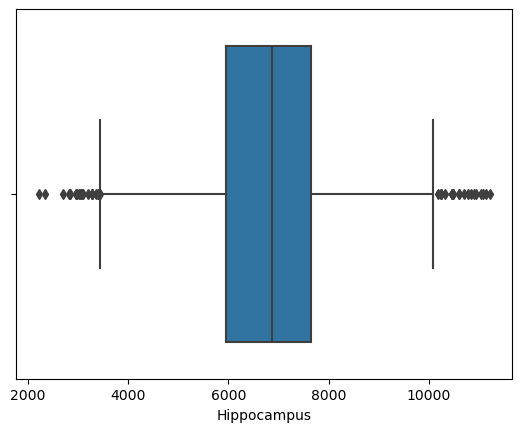

In [108]:
sns.boxplot(x=data['Hippocampus'])
plt.show()

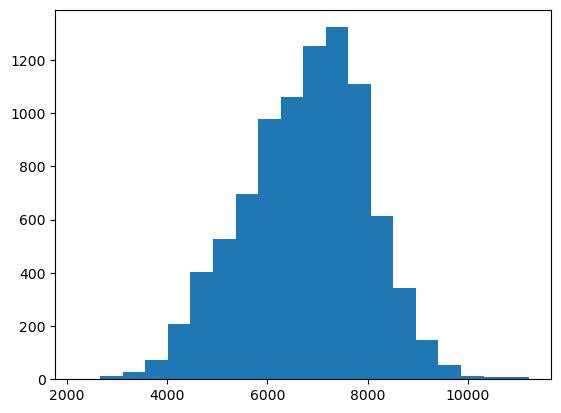

In [109]:
plt.hist(data['Hippocampus'], bins=20)
plt.show()

In [137]:
# Mean Imputation for Hippocampus
mean_columns = ['Hippocampus'] 
mean_imputer = SimpleImputer(strategy='mean')
data[mean_columns] = mean_imputer.fit_transform(data[mean_columns])

## Whole brain

The volumetric measures of the whole brain, ranging from a minimum of 521,287 mm³ to a maximum of 1,486,040 mm³ as reported in your dataset, provide significant insights into overall brain health, development, and potential neurodegenerative conditions. Whole brain volume is a comprehensive measure that includes the cerebral cortex, subcortical structures, cerebellum, and brainstem, reflecting the total size of an individual's brain.

- **Minimum Volume (521,287 mm³):** This represents the smallest whole brain volume in the dataset. Smaller brain volumes can be associated with various factors, including age-related atrophy, neurodegenerative diseases such as Alzheimer's disease, and other conditions that lead to loss of brain tissue. It's important to interpret these volumes in conjunction with clinical assessments and other diagnostic tests to understand their implications fully.

- **Maximum Volume (1,486,040 mm³):** This indicates the largest whole brain volume recorded in the dataset. Larger brain volumes are typically seen in younger individuals and may decrease with age. While larger brain volumes are generally considered beneficial and associated with a reserve against cognitive decline, significant deviations from the norm (either too small or too large) could necessitate further clinical evaluation to rule out pathological conditions.

The range of whole brain volumes highlights the variability among individuals and underscores the importance of a nuanced approach to interpreting these measures. Whole brain volume measurements are crucial in research on brain development, aging, and neurodegenerative diseases. They provide valuable baseline data for longitudinal studies tracking brain volume changes over time and can help in the early detection of brain atrophy associated with various neurological conditions. Additionally, understanding the relationship between whole brain volume and cognitive function, disease progression, and the effects of therapeutic interventions remains a significant area of ongoing research.

In [112]:
WholeBrain_column = data[['WholeBrain']]
unique_values = WholeBrain_column['WholeBrain'].unique()
print(unique_values)

[1229740. 1129830. 1100060. ... 1015040.  952461. 1071710.]


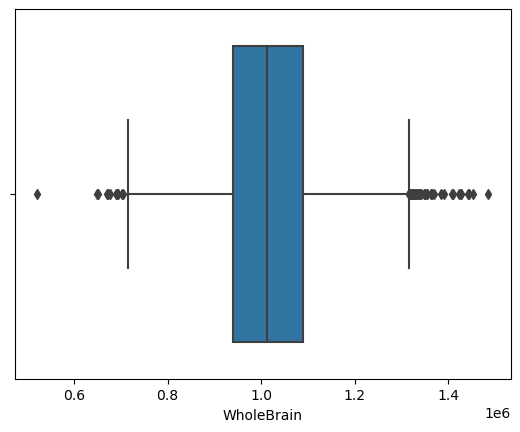

In [113]:
sns.boxplot(x=data['WholeBrain'])
plt.show()

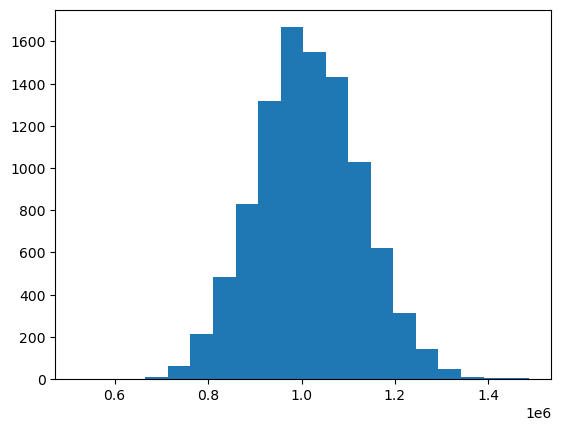

In [114]:
plt.hist(data['WholeBrain'], bins=20)
plt.show()

In [136]:
# Mean Imputation for WholeBrain
mean_columns = ['WholeBrain'] 
mean_imputer = SimpleImputer(strategy='mean')
data[mean_columns] = mean_imputer.fit_transform(data[mean_columns])

## Entorhinal cortex

The volumetric measures for the entorhinal cortex, ranging from 976 mm³ to 7,062 mm³ as reported in the dataset, are particularly relevant in the context of memory and neurological diseases. The entorhinal cortex is a key area of the brain that functions as a hub in the memory network, linking the hippocampus to the neocortex and playing a critical role in memory formation and navigation. Its volume can provide insights into various conditions, especially Alzheimer's disease, where early changes often occur.

- **Minimum Volume (976 mm³):** This represents the smallest entorhinal cortex volume in the dataset. A reduced volume in this region is often among the earliest signs of Alzheimer's disease and other forms of dementia, reflecting the sensitivity of the entorhinal cortex to neurodegeneration. Individuals with volumes at this lower end may be experiencing or at risk for cognitive impairments, especially in memory and spatial orientation.

- **Maximum Volume (7,062 mm³):** This indicates the largest recorded volume of the entorhinal cortex in the dataset. While larger volumes of brain structures are generally considered beneficial and may indicate a reserve that could protect against cognitive decline, it's also essential to consider these figures in a broader clinical and neuropsychological context. Significant deviations from the average, whether larger or smaller, can sometimes indicate underlying pathology or developmental differences.

The range of volumes for the entorhinal cortex underscores the importance of this brain region in cognitive health and disease. Its volume measurement is particularly valuable in early-stage diagnosis and monitoring of Alzheimer's disease, given its vulnerability to early neurodegenerative changes. Additionally, understanding variations in the entorhinal cortex volume can contribute to broader research efforts aimed at identifying the mechanisms of memory disorders and developing targeted therapeutic strategies.

In [117]:
Entorhinal_column = data[['Entorhinal']]
unique_values = Entorhinal_column['Entorhinal'].unique()
print(unique_values)

[4177. 1791. 2427. ... 5732. 5401. 6633.]


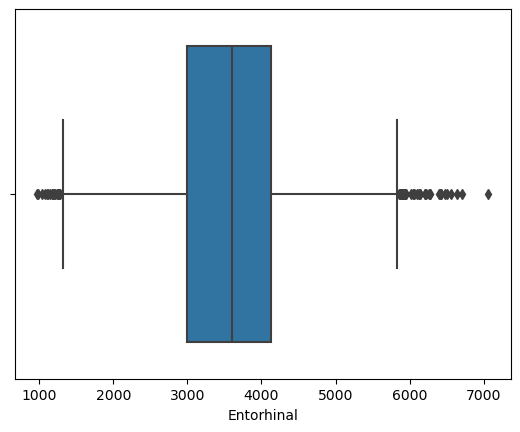

In [118]:
sns.boxplot(x=data['Entorhinal'])
plt.show()

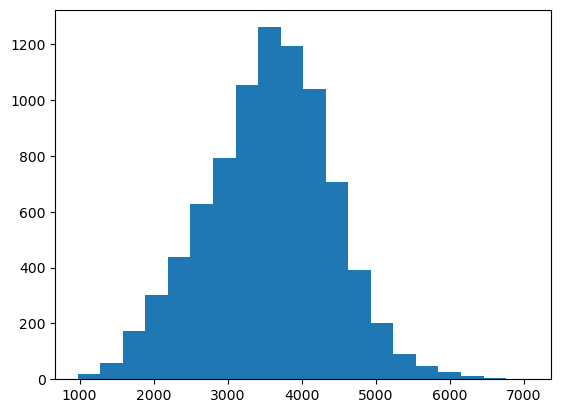

In [119]:
plt.hist(data['Entorhinal'], bins=20)
plt.show()

In [135]:
# Mean Imputation for Entorhinal
mean_columns = ['Entorhinal'] 
mean_imputer = SimpleImputer(strategy='mean')
data[mean_columns] = mean_imputer.fit_transform(data[mean_columns])

## Fusiform gyrus

The volumetric measures for the fusiform gyrus, with a range from 7,739 mm³ to 29,950 mm³ as detailed in the dataset, shed light on aspects of cognitive function related to this brain region. The fusiform gyrus is involved in various high-level cognitive processes, including face and object recognition, reading, and color processing, indicating its crucial role in visual cognition.

- **Minimum Volume (7,739 mm³):** This represents the smallest recorded volume of the fusiform gyrus in the dataset. Smaller volumes in this region could potentially be associated with difficulties in the processes it supports, such as face recognition (prosopagnosia) or dyslexia. However, the clinical significance of smaller fusiform gyrus volumes would need to be interpreted in the context of individual neuropsychological assessments and considering the presence of any related symptoms or conditions.

- **Maximum Volume (29,950 mm³):** This indicates the largest volume of the fusiform gyrus recorded. Larger volumes could suggest a greater neural substrate available for processing visual information, potentially correlating with enhanced abilities in areas such as face recognition or other visuospatial skills. Yet, similar to smaller volumes, significant deviations from the norm, whether larger or smaller, warrant further investigation to fully understand their implications.

The range of fusiform gyrus volumes highlights the anatomical variability present in the human brain and underscores the importance of considering these measures within a comprehensive clinical and cognitive assessment framework. Volumetric analysis of the fusiform gyrus and other brain structures using MRI contributes to our understanding of the neural basis of cognitive functions and disorders. Additionally, such measures are valuable in research on neurodevelopmental, neurodegenerative, and neuropsychiatric conditions, helping to elucidate the relationship between brain structure, function, and behavioral outcomes.

In [121]:
Fusiform_column = data[['Fusiform']]
unique_values = Fusiform_column['Fusiform'].unique()
print(unique_values)

[16559. 15506. 14400. ... 20540. 16478. 20898.]


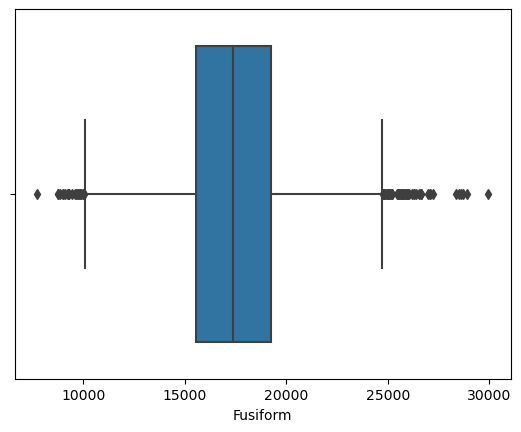

In [122]:
sns.boxplot(x=data['Fusiform'])
plt.show()

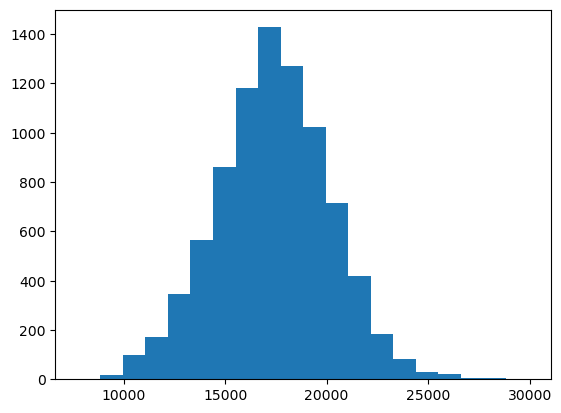

In [123]:
plt.hist(data['Fusiform'], bins=20)
plt.show()

In [134]:
# Mean Imputation for Fusiform
mean_columns = ['Fusiform'] 
mean_imputer = SimpleImputer(strategy='mean')
data[mean_columns] = mean_imputer.fit_transform(data[mean_columns])

## Middle temporal gyrus

The volumetric measures for the middle temporal gyrus, with a range from 8,044 mm³ to 32,324 mm³ as indicated in your dataset, are significant for understanding aspects of cognitive and perceptual processing. The middle temporal gyrus plays a pivotal role in a variety of cognitive functions, including language processing, semantic memory, and the integration of auditory and visual information.

- **Minimum Volume (8,044 mm³):** This represents the smallest recorded volume of the middle temporal gyrus in the dataset. A reduced volume in this area can be associated with various cognitive impairments, depending on the context of other neurological findings and symptoms. For example, it may relate to difficulties in language comprehension or semantic processing. The clinical implications of smaller volumes in the middle temporal gyrus should be interpreted considering the overall neuropsychological profile and any specific symptoms or diagnoses.

- **Maximum Volume (32,324 mm³):** This indicates the largest volume of the middle temporal gyrus recorded. While larger brain volumes are often considered beneficial, reflecting potentially greater neural resources, the specific benefits related to increased volume in the middle temporal gyrus would likely vary among individuals and could include enhanced language and semantic processing capabilities. However, as with smaller volumes, significant deviations from average volumes warrant further exploration to understand their relevance fully.

The variability in volumes of the middle temporal gyrus underscores the diversity of brain structures among individuals and highlights the importance of contextual and comprehensive assessment when interpreting these measures. Volumetric analysis of brain regions such as the middle temporal gyrus through MRI plays a crucial role in neuropsychological research and clinical diagnostics. It aids in identifying structural correlates of cognitive functions and disorders, contributing to a more nuanced understanding of the brain's architecture and its relationship to behavior and cognitive processes.

In [125]:
MidTemp_column = data[['MidTemp']]
unique_values = MidTemp_column['MidTemp'].unique()
print(unique_values)

[27936. 18422. 16972. ... 20378. 18961. 22361.]


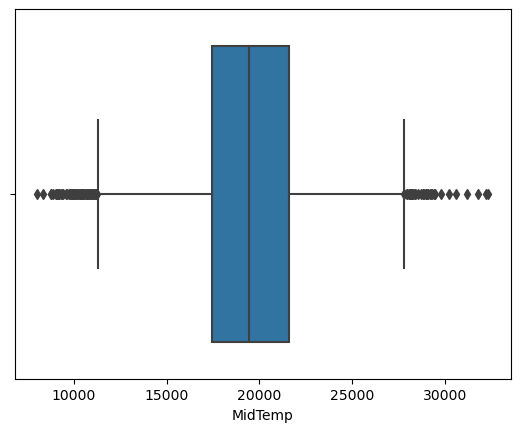

In [126]:
sns.boxplot(x=data['MidTemp'])
plt.show()

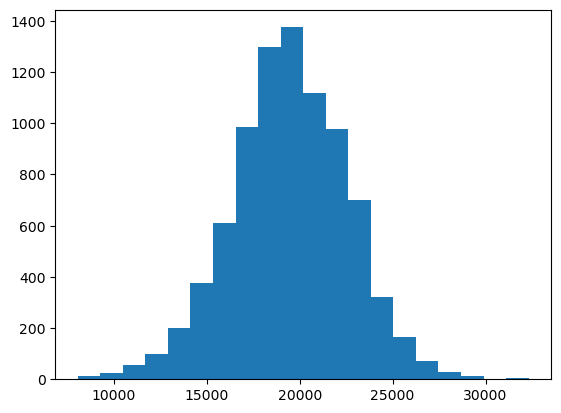

In [127]:
plt.hist(data['MidTemp'], bins=20)
plt.show()

In [133]:
# Mean Imputation for MidTemp
mean_columns = ['MidTemp'] 
mean_imputer = SimpleImputer(strategy='mean')
data[mean_columns] = mean_imputer.fit_transform(data[mean_columns])

## Intracranial volume (ICV) 

The intracranial volume (ICV) represents the total volume within the skull that houses the brain, cerebrospinal fluid, blood vessels, and other structures. It's a crucial measure in neuroscience and neuroimaging research, as it provides a baseline for comparing the size of brain structures relative to the overall size of the cranial cavity. The range you've provided, from 708,913 mm³ to 3,500,150 mm³, covers a wide spectrum that reflects significant variability in brain and skull size among individuals.

- **Minimum Volume (708,913 mm³):** This represents the smallest recorded ICV in the dataset. A smaller ICV could be naturally occurring due to individual differences in head size related to factors like sex, age, and genetic background. However, significantly small ICV could also indicate conditions that lead to reduced brain volume, such as certain forms of neurodegeneration or developmental issues. Interpreting this measure requires careful consideration of other factors, including age, developmental history, and any neurological conditions.

- **Maximum Volume (3,500,150 mm³):** This indicates the largest ICV in the dataset. A larger ICV generally reflects a larger brain and cranial size, which can vary widely among healthy individuals. While a larger brain size has been associated with certain cognitive advantages in some studies, it's essential to note that brain efficiency, connectivity, and other functional aspects are also crucial for cognitive abilities. Extremely high ICV values, especially if they fall outside the expected range for an individual's age and sex, may prompt further examination to rule out pathological conditions that could cause an increase in brain or fluid volume.

The ICV is often used as a covariate in neuroimaging studies to account for individual differences in head size when assessing brain volume and structure. This adjustment helps researchers identify more specific changes or differences in brain tissue volume that could be related to disease, development, aging, or other factors of interest. Understanding the ICV is vital for accurately interpreting changes in brain volume and structure in both research and clinical settings, providing insights into normal brain development, aging, and the presence of neurological conditions.

In [129]:
ICV_column = data[['ICV']]
unique_values = ICV_column['ICV'].unique()
print(unique_values)

[1984660. 1920690. 1906430. ... 1326860. 1341300. 1378290.]


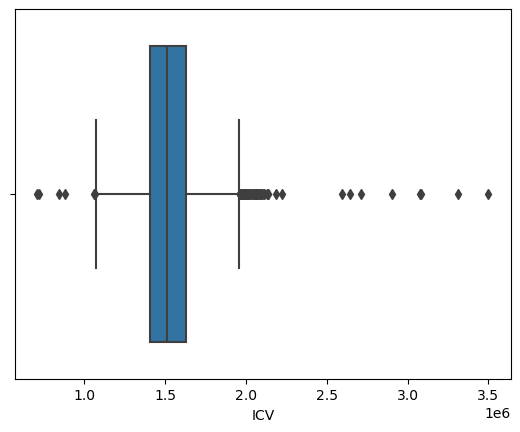

In [131]:
sns.boxplot(x=data['ICV'])
plt.show()

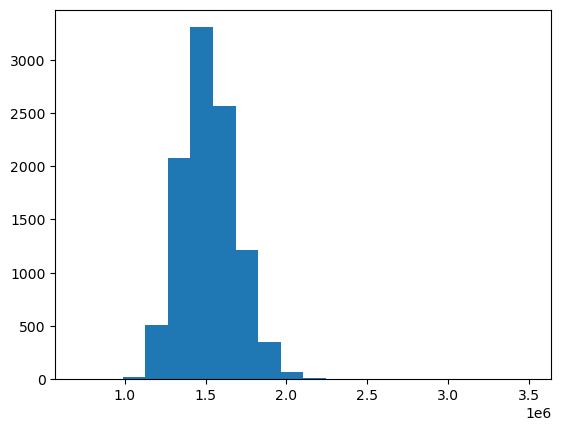

In [132]:
plt.hist(data['ICV'], bins=20)
plt.show()

In [138]:
# Mean Imputation for ICV
mean_columns = ['ICV'] 
mean_imputer = SimpleImputer(strategy='mean')
data[mean_columns] = mean_imputer.fit_transform(data[mean_columns])

# Handling Missing Values in Cognitive Assessments

## Clinical Dementia Rating—Sum of Boxes (CDRSB)

The Clinical Dementia Rating—Sum of Boxes (CDRSB) is a widely used tool in dementia research and clinical practice to quantify the severity and progression of dementia symptoms. The CDRSB score is derived from the Clinical Dementia Rating (CDR), which assesses six domains: memory, orientation, judgment and problem-solving, community affairs, home and hobbies, and personal care. Each domain is rated on a scale from 0 (no impairment) to 3 (severe impairment), and these ratings are then summed to produce the CDRSB score.

The range of scores from 0.0 to 18.0, with 31 unique values, reflects the granularity of this assessment tool in capturing the spectrum of dementia severity:

- **Score of 0.0:** A CDRSB score of 0.0 indicates no impairment, suggesting that the individual does not exhibit symptoms of dementia across all assessed domains. This score is typical for someone considered to be functioning normally, without noticeable memory or cognitive issues.

- **Scores between 0.1 and 18.0:** These scores indicate varying degrees of cognitive impairment, with higher scores reflecting more severe impairment. The range encompasses mild cognitive impairment (often scores closer to the lower end) to severe dementia (scores closer to the maximum of 18.0). The CDRSB can thus track the progression of dementia, providing a numeric value that correlates with the severity of symptoms:

  - **Mild dementia** might be indicated by lower scores in this range, reflecting some difficulty with complex daily activities but generally preserved basic functioning.
  - **Moderate dementia** is suggested by mid-range scores, where individuals may require assistance with daily activities and show significant memory or judgment impairments.
  - **Severe dementia** is indicated by scores towards the higher end of the range, where individuals may require extensive assistance or full-time care due to significant impairments in memory, orientation, and personal care.

The 31 unique values within this range allow for a detailed assessment of dementia severity, facilitating nuanced monitoring of disease progression over time. Clinicians and researchers can use the CDRSB score to evaluate the efficacy of treatments, support care planning, and communicate about the condition's severity in a standardized way.

In [140]:
CDRSB_column = data[['CDRSB']]
unique_values = CDRSB_column['CDRSB'].unique()
print(unique_values)

[ 0.   4.5  6.   3.5  8.   1.   0.5  1.5  2.   5.   2.5  4.   3.   5.5
 10.   9.   nan 16.  14.   7.  12.  10.5 11.   6.5 13.   9.5  7.5 15.
 17.  18.   8.5 12.5]


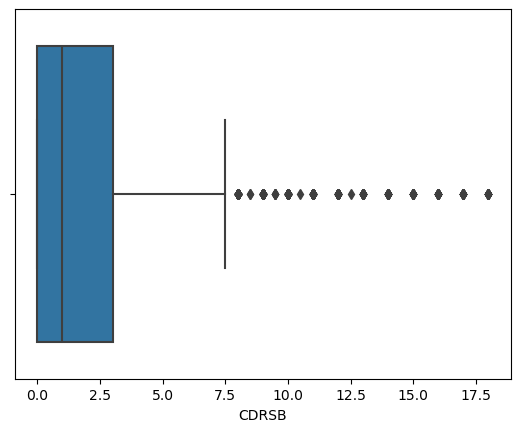

In [142]:
sns.boxplot(x=data['CDRSB'])
plt.show()

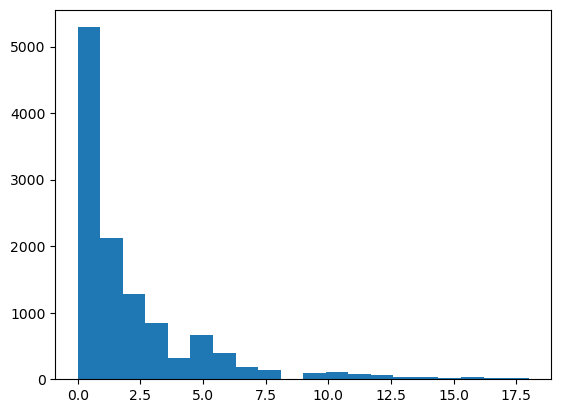

In [143]:
plt.hist(data['CDRSB'], bins=20)
plt.show()

In [144]:
# Median Imputation for CDRSB
median_columns = ['CDRSB'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Alzheimer's Disease Assessment Scale-Cognitive Subscale 11-item version (ADAS-Cog-11)

The Alzheimer's Disease Assessment Scale-Cognitive Subscale 11-item version (ADAS-Cog-11) is a widely used tool for measuring cognitive dysfunction in Alzheimer's disease. It assesses several cognitive domains, including memory, language, praxis (the ability to perform tasks), and orientation, through a series of tasks and questions. The ADAS-Cog-11 is designed to evaluate the severity of cognitive symptoms of dementia and is often used in clinical trials and assessments to monitor disease progression or the efficacy of treatments.

The scoring range for the ADAS-Cog-11 is from 0.0 to 70.0, with 168 unique values, indicating the tool's sensitivity to detecting a wide range of cognitive abilities:

- **Score of 0.0:** A score at the lowest end of the scale indicates no observable cognitive impairment according to the ADAS-Cog-11 assessment, suggesting that the individual's cognitive functions evaluated by the scale are intact. This score is typically seen in individuals without dementia or in the very early stages of cognitive decline where impairments are not yet detectable by this assessment.

- **Scores between 0.1 and 70.0:** This wide scoring range allows for the detection and quantification of mild, moderate, and severe cognitive impairments. Higher scores indicate more severe cognitive dysfunction:
  - **Mild cognitive impairment** may be reflected in lower scores within this range, indicating some difficulty with memory, language, or other cognitive tasks but not necessarily severe enough to interfere significantly with daily life.
  - **Moderate cognitive impairment** is suggested by mid-range scores, where individuals likely exhibit noticeable difficulties in several cognitive domains, impacting their ability to perform daily activities independently.
  - **Severe cognitive impairment** is indicated by scores towards the higher end of the scale, suggesting significant challenges in memory, language, orientation, and praxis. Individuals with scores in this range may require comprehensive assistance with daily activities.

The 168 unique values within the scoring range of the ADAS-Cog-11 provide detailed insight into the level of cognitive impairment, allowing clinicians and researchers to monitor subtle changes over time. This granularity makes the ADAS-Cog-11 a valuable tool for assessing the efficacy of therapeutic interventions and for tracking the progression of Alzheimer's disease and other cognitive disorders in clinical and research settings.

In [145]:
ADAS11_column = data[['ADAS11']]
unique_values = ADAS11_column['ADAS11'].unique()
print(unique_values)

[10.67 22.   19.   24.   25.67 14.33 17.33 15.   20.33 18.    8.67 11.
  5.67  7.    6.67 18.67 11.33 17.67 27.33 32.67 12.33 23.33 19.33  4.33
  4.67  6.33  8.    4.   10.33  8.33  7.33  3.33  2.67  1.    5.   10.
  2.   21.33 22.67 42.67  3.   17.    6.   11.67 14.67  9.33 13.33 20.67
   nan 15.33 24.33  9.67  9.   18.33 25.33 28.    1.67 15.67 16.   31.
 33.    7.67 14.    5.33 25.   24.67 26.67 57.   26.   29.   41.33  2.33
  3.67 21.   34.33  0.67 27.67 30.33 12.   13.   16.33 32.   31.33 41.67
 12.67 13.67 29.33 20.   19.67 34.    1.33 32.33 16.67 33.67 23.    0.
 39.33 21.67 26.33 22.33 31.67  0.33 23.67 38.33 30.   40.   48.67 27.
 45.33 33.33 36.67 53.   44.33 28.67 36.   52.   40.33 35.   42.   46.67
 49.   35.67 55.   41.   34.67 44.67 39.   40.67 59.   45.   29.67 35.33
 30.67 37.   37.67 47.67 63.   38.   47.   58.   46.   28.33 50.   52.33
 42.33 70.   50.33 37.33 56.33 66.   48.   38.67 39.67 56.   57.67 49.67
 54.   43.   44.   62.   69.   64.   68.   52.67 56.67 53.33 

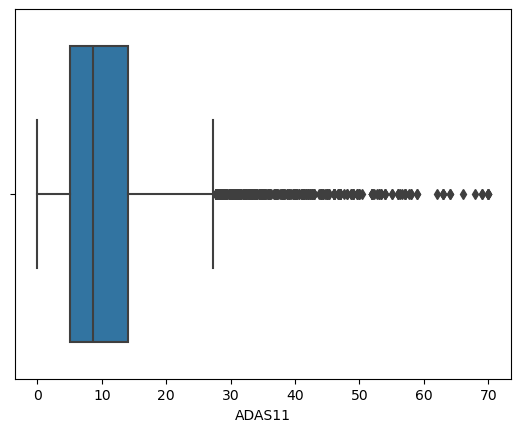

In [146]:
sns.boxplot(x=data['ADAS11'])
plt.show()

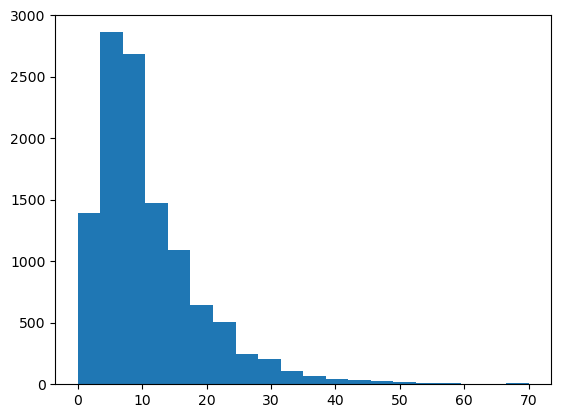

In [147]:
plt.hist(data['ADAS11'], bins=20)
plt.show()

In [148]:
# Median Imputation for ADAS11
median_columns = ['ADAS11'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Alzheimer's Disease Assessment Scale-Cognitive Subscale 13-item version (ADAS-Cog-13)

The Alzheimer's Disease Assessment Scale-Cognitive Subscale 13-item version (ADAS-Cog-13) is an extension of the ADAS-Cog-11, including all its components with the addition of two more items to assess additional cognitive domains. These additional items often evaluate areas such as delayed word recall and recognition, providing a broader assessment of cognitive functions affected by Alzheimer's disease and other forms of dementia. The ADAS-Cog-13 is utilized in clinical settings and research to measure cognitive impairments, track disease progression, and evaluate the efficacy of treatments.

The scoring range of the ADAS-Cog-13 extends from 0.0 to 85.0, with 210 unique values, reflecting its capability to detect a wide spectrum of cognitive impairments:

- **Score of 0.0:** A score at this end of the scale indicates no cognitive impairment as assessed by the ADAS-Cog-13, suggesting that the evaluated cognitive functions are intact. Typically, this would be seen in individuals without dementia or possibly those in the very early stages of cognitive decline where impairments are minimal.

- **Scores between 0.1 and 85.0:** This range accommodates the detection of mild, moderate, and severe cognitive impairments, with higher scores indicating greater severity of cognitive dysfunction:
  - **Mild cognitive impairment** might be represented by lower scores within this range. Individuals may show some difficulty with memory, language, or other cognitive tasks, but these issues may not significantly impact daily functioning.
  - **Moderate cognitive impairment** is indicated by mid-range scores. At this level, individuals are likely to exhibit noticeable difficulties across several cognitive domains, affecting their ability to perform daily activities independently.
  - **Severe cognitive impairment** corresponds to scores at the higher end of the scale. Scores in this range suggest profound challenges in memory, language, orientation, praxis, and other cognitive areas evaluated by the ADAS-Cog-13. Individuals with such scores typically require extensive assistance with daily living activities.

The 210 unique values within the ADAS-Cog-13's scoring range allow for precise tracking of cognitive changes over time, making it an effective tool for longitudinal studies and clinical trials aimed at understanding Alzheimer's disease progression and the impact of interventions. The inclusion of additional items over the ADAS-Cog-11 provides a more comprehensive assessment of cognitive function, enhancing its utility in diagnosing and monitoring Alzheimer's disease and related dementias.

In [149]:
ADAS13_column = data[['ADAS13']]
unique_values = ADAS13_column['ADAS13'].unique()
print(unique_values)

[18.67 31.   30.   35.   37.67 21.33 25.33 22.   28.33 25.   14.67 15.
   nan 11.   11.67 25.67 26.   26.67 40.33 45.67 24.33 35.33 30.33  8.33
  6.67  7.33  9.    8.67  8.   14.33 12.33 10.67  9.67  3.33  1.    6.
  3.   34.33 36.67 36.33 57.67  4.   27.   32.   16.33 12.   10.33  7.
 20.67 18.33 22.33 30.67  5.   10.   23.33  5.67 12.67 37.33 17.67 16.
 18.   29.33 32.33 39.   34.67  2.67  7.67 19.67 24.   41.   48.   14.
  4.33  5.33 19.   15.33 13.   16.67  4.67  3.67  2.   13.33 11.33  9.33
 24.67 28.   34.   72.   21.    6.33 37.   23.   20.33  1.67 28.67 33.67
 27.67 43.   53.33 38.67 44.   56.67 48.33  2.33  0.67 13.67 17.   35.67
 26.33 45.   21.67 32.67 42.33 54.67 19.33 29.   15.67 31.67 29.67 17.33
 49.33 49.   56.33 31.33 43.33 20.   22.67 48.67 33.   46.33  0.   51.33
 36.    0.33 39.33 27.33 23.67 33.33 47.33 55.    1.33 43.67 45.33 40.
 58.33 46.67 68.   59.33 41.33 41.67 39.67 44.33 38.   50.33 50.   56.
 61.67 64.   55.67 47.67 58.67 40.67 47.   38.33 49.67 46.   60.3

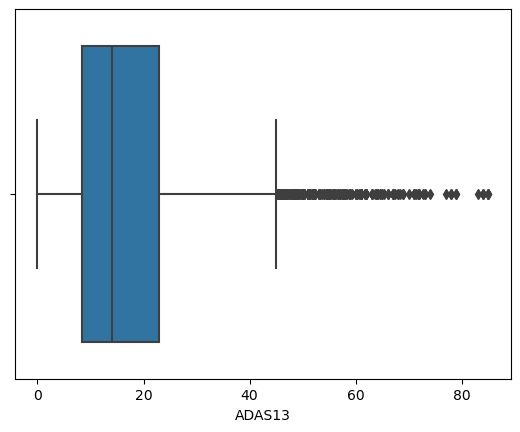

In [150]:
sns.boxplot(x=data['ADAS13'])
plt.show()

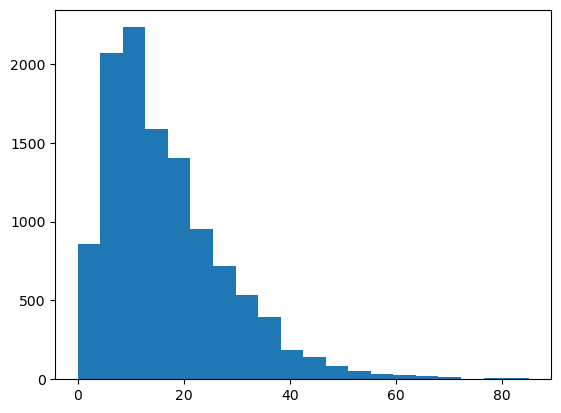

In [151]:
plt.hist(data['ADAS13'], bins=20)
plt.show()

In [152]:
# Median Imputation for ADAS13
median_columns = ['ADAS13'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## ADAS-Q4

The ADAS-Q4, which assesses delayed word recall, is part of the Alzheimer's Disease Assessment Scale-Cognitive (ADAS-Cog) battery, a tool used to evaluate cognitive function in individuals with Alzheimer's disease and other cognitive disorders. This particular component focuses on memory, specifically the ability to recall words after a delay, which is a crucial aspect of cognitive assessment in the context of dementia.

The scoring for the ADAS-Q4 ranges from 0 to 5, with 12 unique values. This range indicates a nuanced approach to measuring the ability to recall words, with:

- **Score of 0:** A score of 0 would indicate no recall of the words, suggesting significant memory impairment. This score is concerning, especially in the context of evaluating for Alzheimer's disease or other dementias, as it reflects substantial difficulties with delayed memory recall.
  
- **Scores between 1 and 5:** These scores reflect varying degrees of recall ability, with higher scores indicating better performance on the delayed word recall task:
  - **Lower scores** (closer to 1) denote more significant difficulty with memory recall, which can be a symptom of cognitive impairment or dementia.
  - **Higher scores** (closer to 5) indicate a stronger ability to recall information after a delay, suggesting healthier cognitive function in this aspect of memory.

The presence of 12 unique values within this seemingly simple 0-5 scoring system suggests that there may be additional nuances or criteria within the scoring methodology to capture subtle differences in recall ability. For example, these unique values might account for partial recall, cues needed for recall, or other factors that provide a more detailed picture of an individual's memory function.

This detailed assessment of delayed word recall is crucial for diagnosing and monitoring cognitive impairment, as memory function is often among the first cognitive abilities to decline in Alzheimer's disease and other dementias. The ADAS-Q4 score can provide valuable insights into the severity of memory impairment, contributing to a comprehensive understanding of an individual's cognitive status and aiding in the tracking of disease progression or response to treatment.

In [153]:
ADASQ4_column = data[['ADASQ4']]
unique_values = ADASQ4_column['ADASQ4'].unique()
print(unique_values)

[ 5.  8. 10.  6.  7.  4.  3.  9.  2.  1.  0. nan]


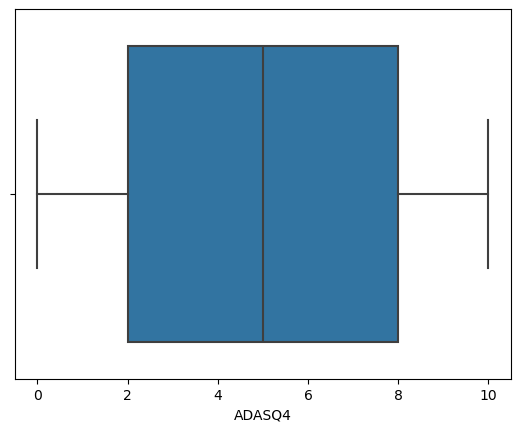

In [154]:
sns.boxplot(x=data['ADASQ4'])
plt.show()

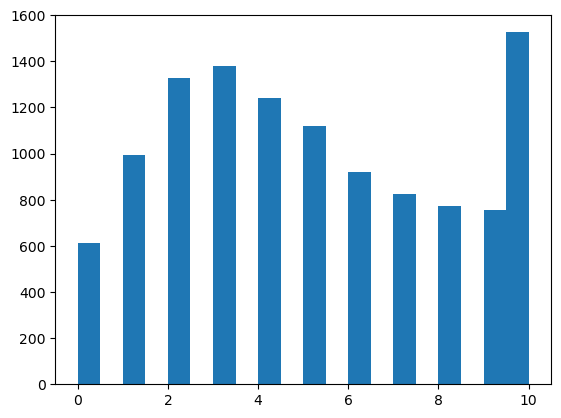

In [155]:
plt.hist(data['ADASQ4'], bins=20)
plt.show()

In [156]:
# Median Imputation for ADASQ4
median_columns = ['ADASQ4'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Mini-Mental State Examination (MMSE) 

The Mini-Mental State Examination (MMSE) is a widely used tool in clinical practice and research for screening cognitive function and monitoring changes over time in individuals. It assesses various aspects of cognitive abilities, including orientation to time and place, immediate recall, short-term memory (through delayed recall tasks), calculation, language (including naming objects and following commands), and visuospatial abilities (such as copying a design).

The MMSE score ranges from 0 to 30, with 31 unique values, reflecting the total number of correct answers out of a possible 30. This scoring system allows for a straightforward interpretation of an individual's cognitive status:

- **Score of 0:** A score at the lower end of the scale suggests severe cognitive impairment, with individuals likely having significant difficulties across most, if not all, areas assessed by the MMSE.

- **Scores between 1 and 23:** Generally, scores in this range are considered indicative of cognitive impairment, with lower scores reflecting more severe levels of impairment. Specifically:
  - **Scores between 1 and 17** typically suggest moderate to severe cognitive impairment, often seen in more advanced stages of dementia.
  - **Scores between 18 and 23** are indicative of mild cognitive impairment, which may be associated with early stages of dementia or other conditions affecting cognitive function.

- **Scores of 24 to 30:** Scores within this range are usually considered within normal limits, with higher scores indicating better cognitive function. However, a score closer to 24 might still raise concerns for mild cognitive impairment, especially if there is a decline from a previously higher baseline score, suggesting the possibility of early cognitive changes.

- **Score of 30:** A perfect score suggests that the individual did not exhibit any detectable cognitive impairment during the MMSE assessment. However, it's important to note that the MMSE cannot detect all forms of cognitive impairment, especially subtle deficits in executive function or mild forms of cognitive decline.

The MMSE serves as a quick and effective screening tool for cognitive dysfunction, helping clinicians identify the need for further, more comprehensive cognitive evaluation. It's widely used in both clinical settings for diagnostic purposes and in research settings for participant screening and monitoring cognitive changes over time.

In [158]:
MMSE_column = data[['MMSE']]
unique_values = MMSE_column['MMSE'].unique()
print(unique_values)

[28. 20. 24. 17. 19. 27. 26. 25. 29. 30. 21. 22. 23. 16. 15. nan 18.  9.
 12. 13. 10. 11. 14.  6.  8.  7.  5.  3.  4.  1.  2.  0.]


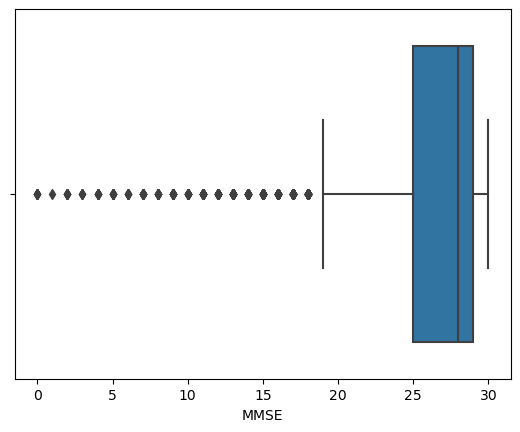

In [159]:
sns.boxplot(x=data['MMSE'])
plt.show()

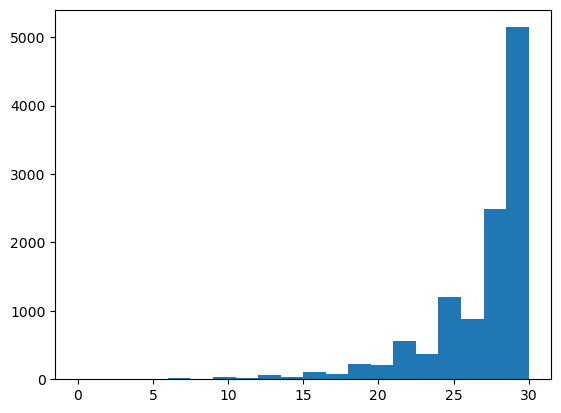

In [160]:
plt.hist(data['MMSE'], bins=20)
plt.show()

In [161]:
# Median Imputation for MMSE
median_columns = ['MMSE'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Rey Auditory Verbal Learning Test (RAVLT) - Immediate recall

The Rey Auditory Verbal Learning Test (RAVLT) immediate recall task is a widely used neuropsychological assessment tool designed to evaluate immediate memory, attention, and learning ability. During this task, participants are asked to listen to a list of words (typically 15) and then immediately recall as many words as possible, in any order. This process is usually repeated over several trials to assess the learning curve, and the immediate recall score is the total number of words correctly recalled across these trials.

The scoring range for RAVLT immediate recall extends from 0 to 75, with 76 unique values, reflecting the cumulative number of words recalled across the initial trials. The scoring interpretation is as follows:

- **Score of 0:** A score at the very bottom of the scale indicates no words were recalled across the trials, suggesting significant difficulties with immediate memory recall or attention. This outcome might be seen in severe cognitive impairment or specific memory disorders.

- **Scores between 1 and 75:** These scores represent the breadth of immediate recall abilities, with higher scores indicating better performance:
  - **Lower scores** (closer to 1) suggest difficulties with immediate recall, which could be due to a range of factors, including attentional deficits, auditory processing issues, or early signs of cognitive impairment.
  - **Mid-range scores** indicate an average ability to learn and recall information immediately after presentation. Performance in this range may reflect typical memory function or mild cognitive impairment, depending on the individual's age, educational background, and other personal factors.
  - **Higher scores** (closer to 75) demonstrate strong immediate recall and learning ability, suggesting robust auditory verbal memory and attentional capacities. High performance in this task is generally seen in individuals with good cognitive health.

- **Score of 75:** A maximum score indicates that the participant recalled all words across all trials, showcasing an exceptional memory performance. Achieving the highest possible score may reflect not only excellent memory and learning ability but also attention to detail and efficient auditory processing.

The RAVLT immediate recall scores provide valuable insights into an individual's memory function, learning curve, and attentional capacity. It is particularly useful in diagnosing memory disorders, assessing the severity of cognitive impairment, and monitoring changes in memory function over time. Given the range of possible scores, the RAVLT can capture subtle differences in memory performance, making it a sensitive tool for neuropsychological assessment.

In [162]:
RAVLT_immediate_column = data[['RAVLT_immediate']]
unique_values = RAVLT_immediate_column['RAVLT_immediate'].unique()
print(unique_values)

[44. 22. 19. 31. 23. 37. 33. 36. 40. 42. 30. 41. 26. 17. 20. 21. 15. 45.
 38. 39. 50. 51. 47. 32. 28. 53. 57. 34.  0. 54. 11. 27. 43. 48. 29. 25.
 61. 52. 24. 12. 56.  8. 35. 55. 62. 46. 49. 63. nan 18. 13.  3. 59. 14.
 16. 60.  9. 58.  6.  7. 10.  5. 75. 72. 67. 70. 71.  4. 65. 64.  2. 68.
  1. 66. 69. 73. 74.]


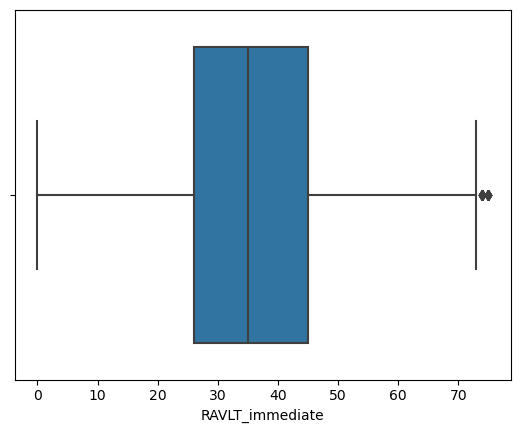

In [163]:
sns.boxplot(x=data['RAVLT_immediate'])
plt.show()

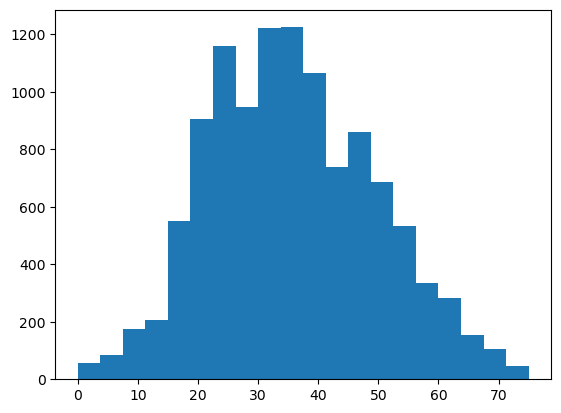

In [164]:
plt.hist(data['RAVLT_immediate'], bins=20)
plt.show()

In [165]:
# Median Imputation for RAVLT_immediate
median_columns = ['RAVLT_immediate'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Rey Auditory Verbal Learning Test (RAVLT) - Learning

The Rey Auditory Verbal Learning Test (RAVLT) assesses a range of verbal memory functions, including immediate memory recall, the ability to learn and retain new verbal information across multiple trials, and the capacity to retrieve this information after a delay. The "RAVLT_learning" specifically measures the learning component over trials, quantifying the improvement or learning ability of an individual from the first to the last learning trial, typically across five trials.

The scoring for the RAVLT_learning ranges from 0 to 12, with 13 unique values, reflecting the number of additional words learned across the trials. This scoring system allows for the assessment of an individual's learning curve or the ability to acquire new verbal information over successive presentations:

- **Score of 0:** A score of 0 indicates no improvement or learning of additional words across the trials, suggesting significant difficulties with acquiring new verbal information. This outcome could be indicative of impairments in short-term memory or learning abilities, which are crucial components of cognitive function.

- **Scores between 1 and 12:** Scores within this range reflect the extent of learning or improvement in recall performance across the trials. The specific scores can indicate:
  - **Lower scores** (closer to 1) denote minimal learning across the trials, which might suggest mild to moderate difficulties with verbal learning or memory consolidation processes.
  - **Higher scores** (closer to 12) represent a significant learning capacity, indicating that the individual was able to effectively learn and recall additional information with repeated exposure. This is generally seen in individuals with intact or strong verbal learning and memory abilities.

The RAVLT_learning score provides valuable insights into an individual's ability to learn and retain new verbal information, a key aspect of cognitive function that can be affected in various neurological and psychiatric conditions. It's particularly useful in the assessment of memory disorders, where deficits in learning and memory consolidation processes are prominent. This measure can help clinicians and researchers differentiate between different types of memory impairments and monitor changes in cognitive function over time.

In [166]:
RAVLT_learning_column = data[['RAVLT_learning']]
unique_values = RAVLT_learning_column['RAVLT_learning'].unique()
print(unique_values)

[ 4.  1.  2.  7.  8.  6.  3.  0.  5.  9. 10. 13. -1. 11. nan 12. -2. -5.
 -4. -3. 14.]


In [169]:

# Counting negative values in column 'A'
negative_count = (data['RAVLT_learning'] < 0).sum()

print(f"Number of negative values in column 'A': {negative_count}")


Number of negative values in column 'A': 287


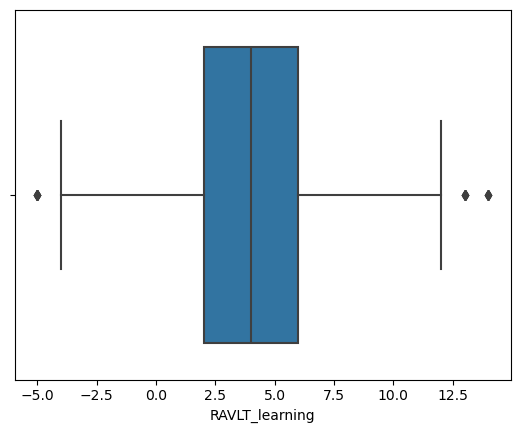

In [167]:
sns.boxplot(x=data['RAVLT_learning'])
plt.show()

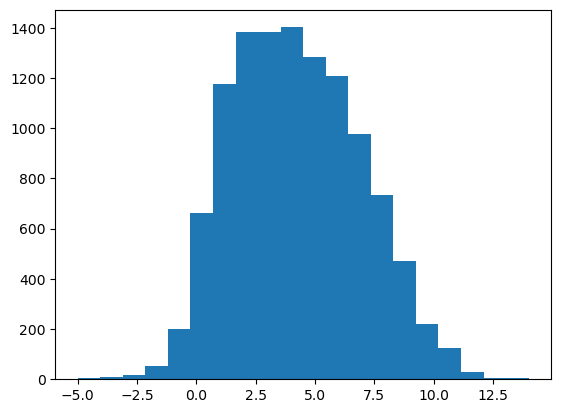

In [168]:
plt.hist(data['RAVLT_learning'], bins=20)
plt.show()

In [170]:
# Median Imputation for RAVLT_learning
median_columns = ['RAVLT_learning'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Rey Auditory Verbal Learning Test (RAVLT) - Forgetting

The Rey Auditory Verbal Learning Test (RAVLT) assesses various aspects of memory, including immediate recall, the ability to learn over repeated trials, and the tendency to forget information after a delay. Each of these components offers insights into different facets of memory function:

### RAVLT Forgetting
- **Score Range:** 0 to 15
- **Unique Values:** 16
- This component measures the number of words forgotten after a delay, typically 20 to 30 minutes, during which no rehearsal of the word list is allowed. The score is calculated based on the difference between the number of words recalled at the last learning trial and the number recalled after the delay. Lower scores indicate less forgetting, suggesting better memory retention. Higher scores signify more significant forgetting, which can be indicative of impairments in long-term memory or consolidation processes.

Each component of the RAVLT provides valuable information about different aspects of verbal memory and learning. By analyzing these scores, clinicians and researchers can gain insights into an individual's memory function, including their ability to encode, store, and retrieve verbal information. This can be particularly useful in diagnosing and monitoring cognitive disorders, understanding memory impairments, and guiding interventions tailored to specific memory deficits.

In [171]:
RAVLT_forgetting_column = data[['RAVLT_forgetting']]
unique_values = RAVLT_forgetting_column['RAVLT_forgetting'].unique()
print(unique_values)

[  6.   4.   7.   5.   1.   2.   8.   3.  -2.  -1.   0.  10.  nan  11.
   9.  -7.  -5.  12.  -8.  -4.  13.  -9. -12.  -3.  15. -10.  14.  -6.
 -24. -35. -33. -19. -23. -22. -17. -28. -25. -27.]


In [172]:

# Counting negative values in column 'A'
negative_count = (data['RAVLT_forgetting'] < 0).sum()

print(f"Number of negative values in column 'A': {negative_count}")


Number of negative values in column 'A': 256


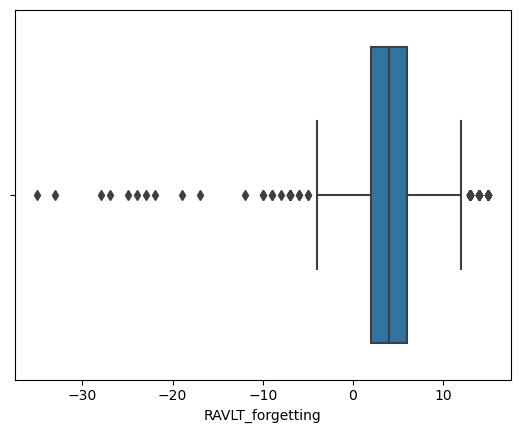

In [173]:
sns.boxplot(x=data['RAVLT_forgetting'])
plt.show()

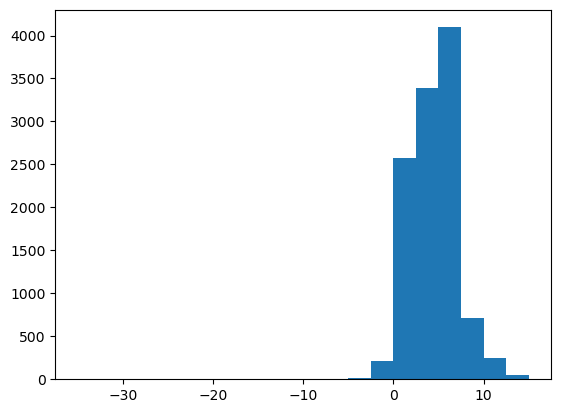

In [174]:
plt.hist(data['RAVLT_forgetting'], bins=20)
plt.show()

In [175]:
# Median Imputation for RAVLT_forgetting
median_columns = ['RAVLT_forgetting'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Rey Auditory Verbal Learning Test (RAVLT) - Percentage of Information Forgotten

The Rey Auditory Verbal Learning Test (RAVLT) is a tool for assessing various aspects of verbal memory, including immediate recall, learning ability over trials, the capacity to retain information after a delay, and the tendency to forget information. It provides a comprehensive look at auditory verbal learning and memory functions, which are crucial for diagnosing and understanding cognitive impairments, memory disorders, and the impact of neurological conditions.

### RAVLT—Percentage of Information Forgotten
- This calculates the percentage of information forgotten after a delay, offering a proportionate measure of memory retention and forgetting.
- The wide range of scores, with 116 unique values, indicates the variability in how much information individuals retain or forget as a percentage of what they had initially learned.

The RAVLT is valuable for its detailed exploration of different facets of memory function. It helps clinicians and researchers identify specific memory deficits, track changes in memory function over time, and evaluate the impact of treatments or interventions on memory. The nuanced data provided by the RAVLT can contribute to a comprehensive assessment of cognitive health, particularly in the context of memory-related disorders such as Alzheimer's disease, other dementias, and conditions affecting memory.

In [176]:
RAVLT_perc_forgetting_column = data[['RAVLT_perc_forgetting']]
unique_values = RAVLT_perc_forgetting_column['RAVLT_perc_forgetting'].unique()
print(unique_values)

[   54.5455    100.         36.3636     11.1111     12.5        16.6667
    18.1818     44.4444     80.         50.         37.5        83.3333
    63.6364     85.7143     75.         40.         14.2857     45.4545
    25.         38.4615     66.6667    -28.5714    -14.2857      7.14286
    26.6667     62.5        41.6667     20.         33.3333          nan
    22.2222     53.8462     88.8889     15.3846      8.33333    30.
     0.          9.09091    10.         57.1429     28.5714     76.9231
    55.5556     27.2727     13.3333     87.5        42.8571     77.7778
    21.4286     35.7143     60.         73.3333     64.2857     30.7692
     6.66667    -7.14286   -15.3846   -100.         71.4286     70.
    -7.69231    58.3333      7.69231   -20.         81.8182     46.1538
    -8.33333    23.0769     72.7273     90.9091    -16.6667     90.
   -25.       -400.         69.2308    -66.6667     61.5385    -11.1111
    86.6667    -18.1818    -12.5      -450.        -33.3333    -10.
    -9

In [177]:
# Counting negative values in column 'A'
negative_count = (data['RAVLT_perc_forgetting'] < 0).sum()

print(f"Number of negative values in column 'A': {negative_count}")


Number of negative values in column 'A': 252


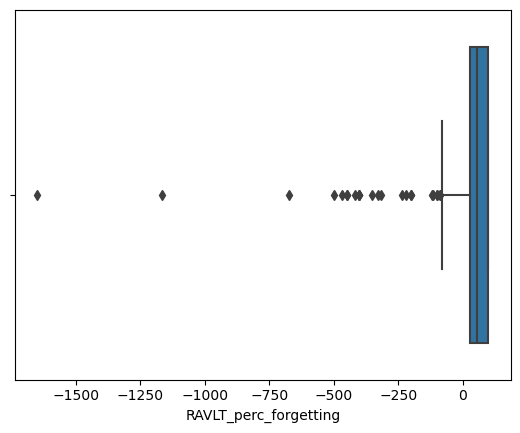

In [178]:
sns.boxplot(x=data['RAVLT_perc_forgetting'])
plt.show()

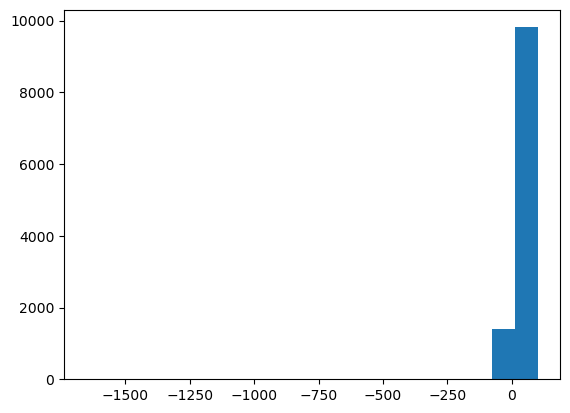

In [179]:
plt.hist(data['RAVLT_perc_forgetting'], bins=20)
plt.show()

In [180]:
# Median Imputation for RAVLT_perc_forgetting
median_columns = ['RAVLT_perc_forgetting'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Logical Memory—Immediate Recall test

The Logical Memory—Immediate Recall test, often part of the Wechsler Memory Scale, assesses verbal memory and immediate recall abilities by requiring individuals to listen to a story or narrative and then recall as much detail as possible immediately afterward. This test evaluates several aspects of memory, including attention to and immediate recall of verbal information, which are critical for daily functioning and are often affected in cognitive disorders.

The scores range from 0 to 25, with 26 unique values, representing the spectrum of immediate recall abilities across individuals:

- **Score of 0:** Indicates no information was recalled from the narrative, suggesting significant impairment in immediate verbal memory recall. This could be due to severe memory disorders, attentional deficits, or other cognitive impairments.

- **Scores between 1 and 25:** Reflect varying degrees of ability to recall the story's details immediately after hearing it. Higher scores within this range indicate better immediate verbal memory recall. Specifically:
  - **Lower scores** (closer to 1) suggest difficulties in retaining or recalling verbal information immediately after presentation, which might be observed in individuals with mild to moderate cognitive impairments.
  - **Mid-range scores** suggest average performance, indicating a typical ability to remember immediate verbal information for the general population or the specific age group being assessed.
  - **Higher scores** (closer to 25) are indicative of strong immediate recall abilities, possibly reflecting above-average memory function or well-developed compensatory strategies for remembering verbal information.

The availability of 26 unique values allows for a nuanced assessment of immediate verbal memory performance, providing valuable insights for clinicians and researchers. Identifying specific memory impairments can help in diagnosing cognitive conditions, understanding their severity, planning interventions, and monitoring changes in memory function over time. This test is particularly useful in evaluating individuals with suspected memory disorders, such as Alzheimer's disease and other forms of dementia, where verbal memory can be significantly affected.

In [181]:
LDELTOTAL_column = data[['LDELTOTAL']]
unique_values = LDELTOTAL_column['LDELTOTAL'].unique()
print(unique_values)

[10.  2. nan  0.  4.  5.  3. 12. 15. 13. 18.  1. 19. 14.  9.  7. 11.  8.
  6. 20. 17. 21. 16. 22. 23. 24. 25.]


In [182]:
# Counting negative values in column 'A'
negative_count = (data['LDELTOTAL'] < 0).sum()

print(f"Number of negative values in column 'A': {negative_count}")


Number of negative values in column 'A': 0


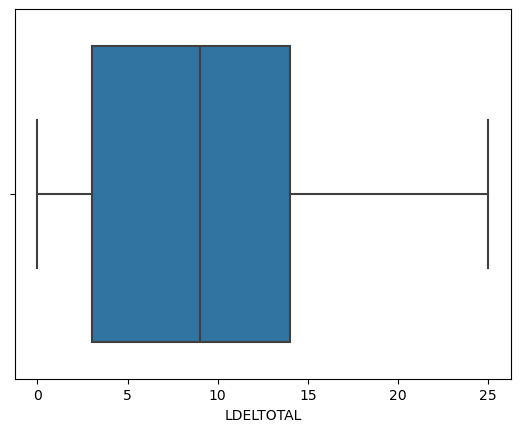

In [183]:
sns.boxplot(x=data['LDELTOTAL'])
plt.show()

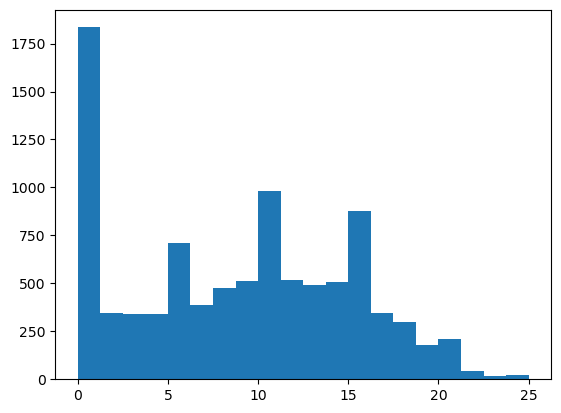

In [184]:
plt.hist(data['LDELTOTAL'], bins=20)
plt.show()

In [185]:
# Median Imputation for LDELTOTAL
median_columns = ['LDELTOTAL'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Digit Symbol Coding test

The Digit Symbol Coding test is part of the Wechsler Adult Intelligence Scale (WAIS) and is used to assess processing speed, attention, and working memory. Participants are required to match symbols with corresponding numbers according to a key within a limited time frame, measuring their speed and accuracy in completing this cognitive task.

### Score Range and Interpretation
- **Scores range from 0 to 133**, with 82 unique values, reflecting the number of correct matches a participant can make within the allotted time.
- **Score of 0:** A score at the lower end suggests significant difficulties with processing speed, attention, or working memory. It could indicate cognitive impairment or specific challenges in these areas.
- **Scores between 1 and 133:** This range allows for a detailed assessment of cognitive processing speed. Higher scores indicate faster processing speed and better working memory and attentional abilities:
  - **Lower scores** within this range might suggest slower processing speed or difficulties with sustained attention or working memory, which could be seen in various neurological and psychiatric conditions.
  - **Mid-range scores** suggest average processing speed and working memory capacity, aligning with typical cognitive functioning.
  - **Higher scores** reflect superior processing speed and cognitive efficiency in the domains of attention and working memory. High performance in this test is often associated with overall cognitive health and can be indicative of strong executive functioning skills.

### Clinical and Research Use
The Digit Symbol Coding test is widely used in both clinical and research settings to:
- Evaluate cognitive decline in neurodegenerative diseases such as Alzheimer's disease and Parkinson's disease.
- Assess cognitive impairments in psychiatric conditions like major depressive disorder and schizophrenia.
- Monitor changes in cognitive function over time or in response to interventions.
- Provide insights into the cognitive impact of brain injuries or concussions.

The variability in scores, represented by the 82 unique values, provides nuanced insight into an individual's cognitive processing speed and efficiency, offering valuable information for diagnosing cognitive conditions, planning interventions, and tracking cognitive changes over time.

In [187]:
DIGITSCOR_column = data[['DIGITSCOR']]
unique_values = DIGITSCOR_column['DIGITSCOR'].unique()
print(unique_values)

[34. 25. 19. 21. 16. 24. 30. 28. 29. 38. 42. 44. 40. 32. 33.  9.  7. 27.
 37. 36. 63. 64. 46. 45. 47. 43. nan  3.  0. 41. 23. 49. 54. 48. 56. 52.
 53. 31. 50. 20. 22. 66. 68. 60. 13. 58. 61. 57. 51. 55. 59. 39. 35. 26.
 65. 11. 14. 12.  8. 67. 70. 15.  4. 10.  2. 62. 17. 18. 72.  6.  1.  5.
 83. 80. 77. 79. 78. 81. 69. 74. 75. 76.]


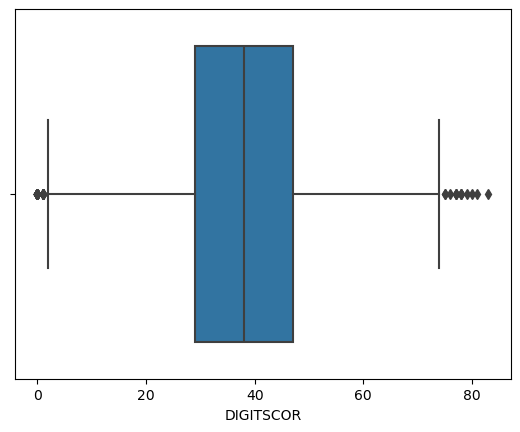

In [188]:
sns.boxplot(x=data['DIGITSCOR'])
plt.show()

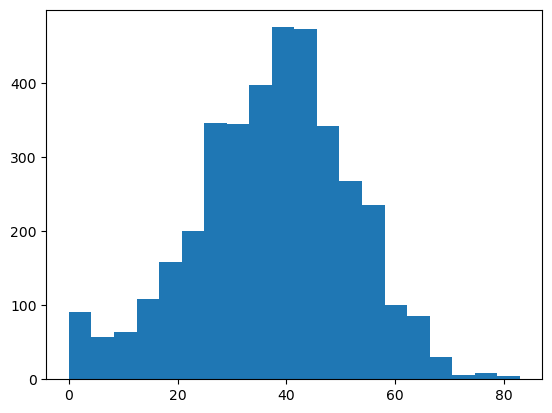

In [189]:
plt.hist(data['DIGITSCOR'], bins=20)
plt.show()

In [190]:
# Median Imputation for DIGITSCOR
median_columns = ['DIGITSCOR'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Trail Making Test, Part B (TRABSCOR)

The Trail Making Test Part B (TMT-B) assesses executive functions, including task switching, cognitive flexibility, and processing speed. Participants draw lines to connect alternating numbers and letters in sequence (e.g., 1-A-2-B...). The score, measured in seconds, ranges widely with 293 unique values, indicating the time taken to complete the task. Longer times suggest difficulties with executive function, which can be seen in various neurological and psychiatric conditions, including dementia, traumatic brain injury, and depression.

These tests collectively provide valuable insights into different aspects of cognitive function, including memory, processing speed, and executive functioning. Their scores can help in diagnosing cognitive impairments, understanding their severity, and monitoring changes over time, particularly in clinical and research settings focused on cognitive health and neurodegeneration.

In [191]:
TRABSCOR_column = data[['TRABSCOR']]
unique_values = TRABSCOR_column['TRABSCOR'].unique()
print(unique_values)

[112.  148.  135.  126.  275.  271.  141.  240.  144.  230.   90.  116.
  83.   68.   85.  168.  145.  153.   94.  209.  300.  100.  218.  280.
 101.  186.  131.   99.  179.   49.   40.   47.   79.   62.   66.  110.
 217.   76.   61.   75.  114.   82.  118.   57.   67.    nan   0.  227.
  60.   54.   69.   87.   81.   55.   92.  105.   93.  160.   72.   73.
  48.   70.  178.  121.  102.  107.  201.  193.   84.  151.  173.  180.
  77.   53.   58.   96.  111.   65.   91.   59.  108.   35.   46.   56.
  52.   45.   51.  161.   80.   41.  127.   50.   74.  140.  159.  174.
 157.  261.   89.   98.  123.  177.   97.  117.   43.  125.  130.  119.
 252.  103.  190.  167.  146.  166.   44.   42.  158.  150.  165.   63.
  78.   86.  196.   64.  120.  210.   31.   38.  138.  137.  136.  200.
 197.  106.  251.   71.  109.   95.  243.  122.  204.  113.  224.  128.
 104.  149.  139.  258.   88.  129.  195.  228.  115.  170.  147.  187.
 250.  273.   37.   34.  214.  226.   11.  132.  247.  277.  289

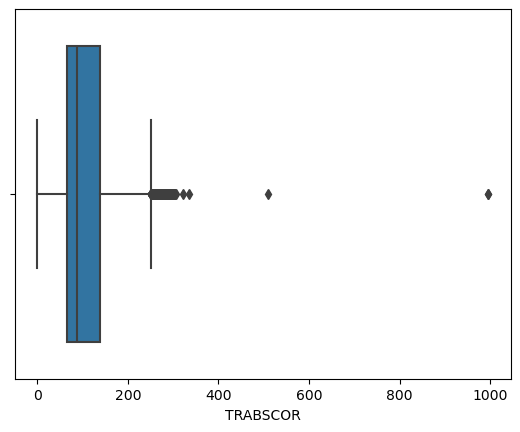

In [192]:
sns.boxplot(x=data['TRABSCOR'])
plt.show()

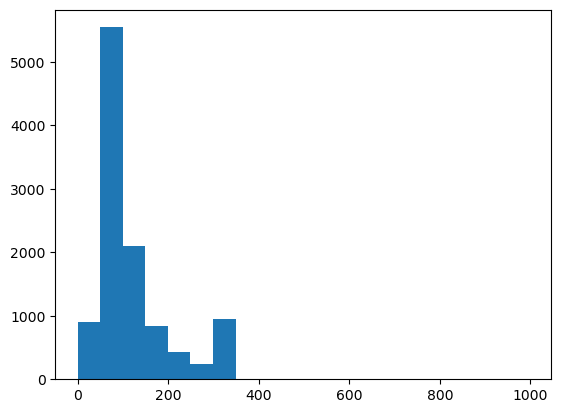

In [193]:
plt.hist(data['TRABSCOR'], bins=20)
plt.show()

In [194]:
# Median Imputation for TRABSCOR
median_columns = ['TRABSCOR'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Functional Activities Questionnaire (FAQ)

The Functional Activities Questionnaire (FAQ) is a tool used to assess the impact of cognitive impairment on an individual's ability to perform activities of daily living (ADLs), particularly those activities that require complex thinking and planning. It's commonly used in the evaluation of older adults and can help in diagnosing conditions like Alzheimer's disease and other forms of dementia.

### Key Points About the FAQ:

- **Score Range:** The FAQ scores range from 0 to 30, with 31 unique values. Each point on the scale represents a specific level of dependency or difficulty in performing a range of daily activities, such as managing finances, shopping, playing a game of skill, and following a TV program or reading.

- **Interpretation:**
  - **Score of 0:** Indicates that the individual reports no difficulty in performing any of the activities assessed by the FAQ. A score of 0 suggests independent functioning in these complex daily activities.
  - **Scores between 1 and 30:** These scores indicate varying degrees of difficulty or dependency in performing daily activities, with higher scores reflecting greater impairment:
    - **Lower scores** (closer to 1) suggest mild difficulties in performing one or more of the assessed activities, possibly indicating mild cognitive impairment or early-stage dementia.
    - **Mid-range scores** indicate moderate difficulties, suggesting more significant cognitive impairment that impacts daily functioning. This level of impairment may correspond with moderate dementia.
    - **Higher scores** (closer to 30) reflect severe difficulties or complete dependency in daily activities, typically associated with advanced stages of dementia or severe cognitive impairment.

- **Utility:** The FAQ is valuable for clinicians and researchers in determining the level of assistance an individual may need in their daily life, contributing to care planning and assessments of disease progression. It also helps in distinguishing between those with mild cognitive impairment who can still function independently in daily life and those with more advanced dementia who require significant assistance.

The FAQ, through its focus on the practical implications of cognitive decline, provides essential insights into how cognitive impairments affect an individual's ability to live independently and manage daily tasks. This information is crucial for diagnosing dementia, evaluating its severity, and planning appropriate care and support services.

In [195]:
FAQ_column = data[['FAQ']]
unique_values = FAQ_column['FAQ'].unique()
print(unique_values)

[ 0. 10. 12. 17. 14.  1.  2.  6. 11. 15. 20. 22. 26.  5.  3. 16. 23.  8.
 18. 13.  7.  9. nan 28. 29. 30. 27. 25.  4. 24. 21. 19.]


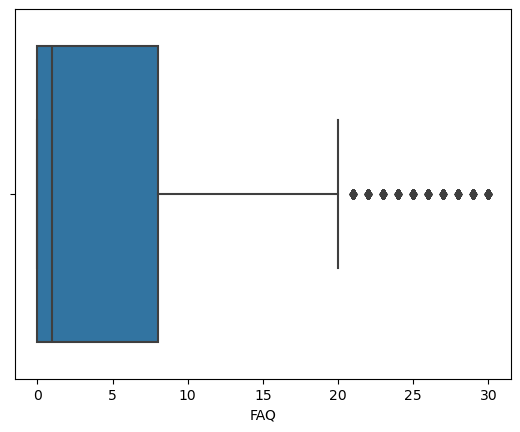

In [196]:
sns.boxplot(x=data['FAQ'])
plt.show()

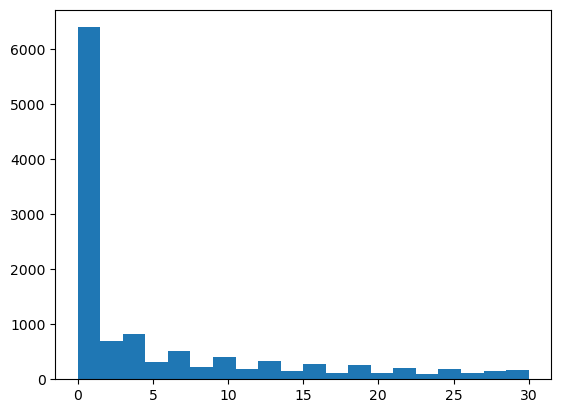

In [197]:
plt.hist(data['FAQ'], bins=20)
plt.show()

In [198]:
# Median Imputation for FAQ
median_columns = ['FAQ'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Montreal Cognitive Assessment (MoCA)

The Montreal Cognitive Assessment (MoCA) are two distinct instruments used in the evaluation of cognitive function and daily living abilities, particularly in the context of cognitive decline and dementia.

- The MoCA is a widely used screening tool for detecting mild cognitive impairment and Alzheimer's disease. 
- It assesses several cognitive domains, including attention and concentration, executive functions, memory, language, visuoconstructional skills, conceptual thinking, calculations, and orientation.
- Scores range from 0 to 30, with 31 unique values. A higher score indicates better cognitive function. The MoCA is sensitive to mild cognitive dysfunction, making it a valuable tool for early detection of cognitive impairments.
- A score of 26 or above is generally considered normal, while scores below 26 suggest potential cognitive impairment.

MoCA provide valuable information for clinicians in assessing the cognitive and functional abilities of individuals, aiding in the diagnosis and monitoring of cognitive decline and dementia. The FAQ focuses more on the impact of cognitive decline on daily living activities, while the MoCA offers a broad assessment of cognitive functions, including those that may be subtly impaired in the early stages of cognitive disorders.

In [199]:
MOCA_column = data[['MOCA']]
unique_values = MOCA_column['MOCA'].unique()
print(unique_values)

[nan 27. 24. 28. 22. 29. 20. 25. 23. 21. 30. 10. 26. 14. 15. 19. 17.  1.
  8. 12. 16. 18. 11.  9. 13.  7.  6.  2.  4.  0.  5.  3.]


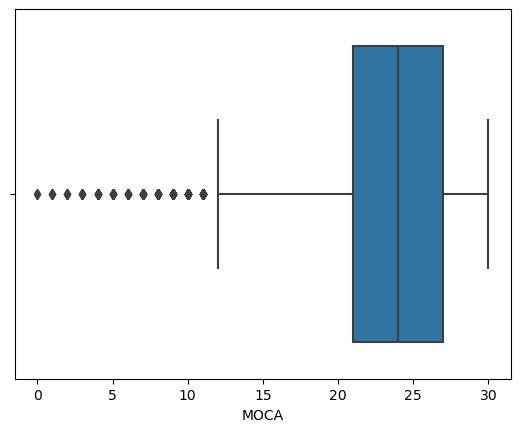

In [200]:
sns.boxplot(x=data['MOCA'])
plt.show()

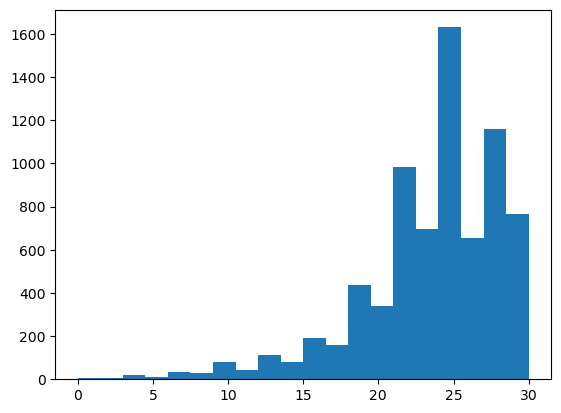

In [201]:
plt.hist(data['MOCA'], bins=20)
plt.show()

In [202]:
# Median Imputation for MOCA
median_columns = ['MOCA'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Everyday Cognition (Ecog) - Memory (Mem) Component of Ecog Scales

The Everyday Cognition (Ecog) scales are designed to assess cognitive functions and daily living activities from the perspective of both the patient (Pt) and a study partner (SP), such as a family member or close associate who knows the patient well. These scales are valuable in providing insights into how cognitive changes affect the ability to perform everyday tasks, reflecting the practical implications of cognitive decline or improvement.

### Memory (Mem) Component of Ecog Scales

- **Score Range:** For the Memory component, the scores range from 1.0 to 4.0, encompassing 31 unique values within this range. This scoring framework allows for a nuanced assessment of memory function as it applies to daily living and activities.
  
- **Scoring Interpretation:**
  - **Score of 1.0:** Indicates no observed difficulty or impairment in memory-related tasks, suggesting that the individual can remember things as well as they could before any cognitive changes were noted.
  - **Scores between 1.1 and 3.9:** Reflect varying degrees of memory difficulty, with higher scores indicating greater challenges in memory. This gradual increase helps to distinguish between mild, moderate, and more significant memory issues.
  - **Score of 4.0:** Suggests severe memory difficulties, where the individual's memory problems are frequent and interfere significantly with daily activities.

The Ecog scales, including the Memory scale, are especially useful in both clinical and research settings for tracking cognitive changes over time and evaluating the impact of these changes on daily functioning. By incorporating assessments from both the patient and an observer (study partner), the Ecog provides a comprehensive view of cognitive function that includes both subjective and objective perspectives. This dual assessment approach is crucial for understanding the real-world implications of cognitive impairment and guiding interventions and support strategies.

In [203]:
EcogPtMem_column = data[['EcogPtMem']]
unique_values = EcogPtMem_column['EcogPtMem'].unique()
print(unique_values)

[    nan 1.625   1.875   1.25    1.125   2.5     3.25    2.75    1.375
 2.625   2.      1.5     2.375   2.16667 1.      2.125   3.28571 3.375
 3.      1.75    2.57143 2.875   2.85714 2.25    3.125   4.      3.5
 3.625   1.57143 3.14286 1.71429 1.28571 3.75    3.875   3.57143 3.33333
 2.42857 2.14286 1.42857 2.28571 2.66667 2.71429 3.2     1.66667 1.85714
 3.42857 3.71429 2.2     1.14286 1.83333 3.16667 2.33333 1.6     1.8
 1.33333 3.85714 1.16667 2.4     2.83333 3.66667 3.6    ]


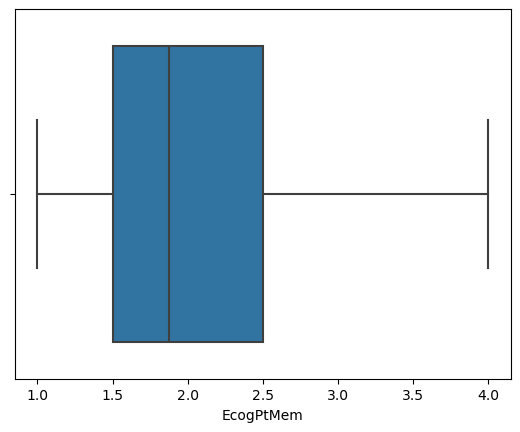

In [204]:
sns.boxplot(x=data['EcogPtMem'])
plt.show()

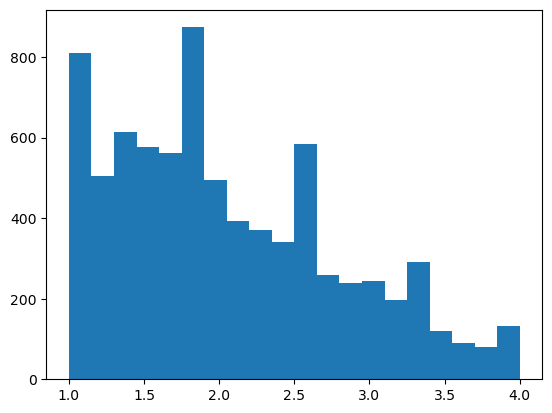

In [205]:
plt.hist(data['EcogPtMem'], bins=20)
plt.show()

In [206]:
# Mean Imputation for EcogPtMem
mean_columns = ['EcogPtMem']  
mean_imputer = SimpleImputer(strategy='mean') 
data[mean_columns] = mean_imputer.fit_transform(data[mean_columns])

## Everyday Cognition (Ecog) - Language (Lang) Component of Ecog Scales

The Everyday Cognition (Ecog) scales OF the patient (Pt) in the domains of Language (Lang) each have scores that range from 1.0 to 4.0. These scores are designed to reflect the observed frequency of difficulties in daily cognitive tasks within each domain, with:

- **1.0 indicating "No difficulty,"**
- **2.0 indicating "Questionable or very mild difficulty,"**
- **3.0 indicating "Mild difficulty,"** and
- **4.0 indicating "Moderate difficulty."**

These scales are part of a broader assessment tool used to evaluate cognitive functions in the context of everyday living, providing valuable insights into how cognitive impairments, particularly in the areas of visuospatial abilities and language, manifest in day-to-day activities. 

- **Language (Lang):** This domain evaluates the capacity for using and understanding language, which includes both verbal and written communication. This might involve challenges with finding words, following conversations, reading comprehension, or the ability to express oneself clearly.

The scores on the Ecog scales provide a quantitative measure of the degree to which individuals are experiencing cognitive difficulties in these areas, offering a nuanced view that can help in both clinical assessments and research contexts to understand the impact of cognitive decline on daily living. These assessments are particularly relevant for conditions that affect cognitive functions, such as Alzheimer's disease, other forms of dementia, or brain injuries.

In [207]:
EcogPtLang_column = data[['EcogPtLang']]
unique_values = EcogPtLang_column['EcogPtLang'].unique()
print(unique_values)

[    nan 1.11111 1.      1.44444 1.22222 2.66667 2.      1.77778 2.22222
 1.33333 2.55556 1.55556 1.88889 1.375   2.11111 3.      2.77778 2.88889
 2.33333 2.44444 3.55556 1.66667 3.77778 1.57143 2.75    3.11111 1.875
 1.125   1.625   2.125   3.44444 2.5     3.22222 1.75    3.33333 2.375
 1.42857 2.85714 4.      3.66667 2.875   1.14286 2.28571 1.85714 3.42857
 1.83333 3.375   1.25    3.88889 2.25    2.42857 1.28571 2.14286 1.71429
 1.5     3.875   2.57143 2.625   3.125   1.2     3.625   3.85714 2.71429
 2.8     3.5     1.8     3.14286 3.57143 2.4     3.25    3.6     3.71429
 3.16667]


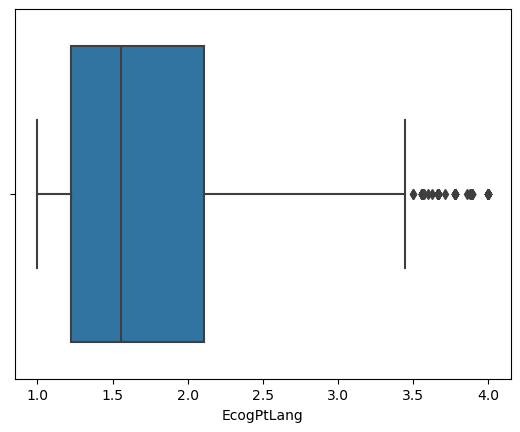

In [208]:
sns.boxplot(x=data['EcogPtLang'])
plt.show()

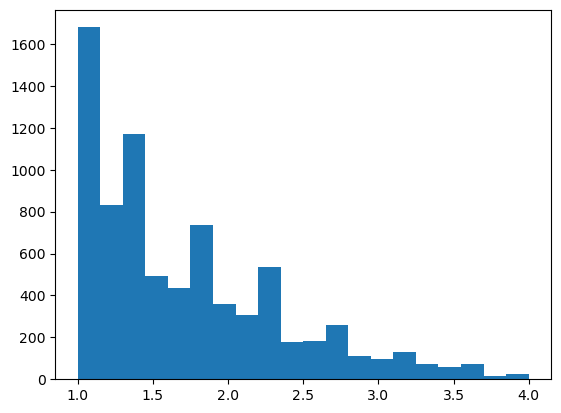

In [209]:
plt.hist(data['EcogPtLang'], bins=20)
plt.show()

In [210]:
# Mean Imputation for EcogPtLang
mean_columns = ['EcogPtLang']  
mean_imputer = SimpleImputer(strategy='mean') 
data[mean_columns] = mean_imputer.fit_transform(data[mean_columns])

## Everyday Cognition (Ecog) - visuospatial abilities Component of Ecog Scales

The Everyday Cognition (Ecog) scales for visuospatial abilities assess how an individual's cognitive decline affects their daily functioning in tasks requiring visuospatial skills. These tasks may include navigating an environment, judging distance, understanding and interpreting visual information, and other activities that require processing visual and spatial cues. The scores range from 1.0 to 4.0 of the patient (Pt), indicating the degree of difficulty the individual experiences in these activities:

- **Score of 1.0:** Indicates no difficulty with visuospatial tasks, suggesting that the patient's visuospatial abilities are functioning well in everyday contexts.

- **Score of 2.0:** Suggests mild difficulty with visuospatial tasks, which may be noticeable but not significantly impairing the patient's ability to perform daily activities that require these skills.

- **Score of 3.0:** Indicates moderate difficulty with visuospatial tasks, suggesting more significant challenges that likely impact the patient's daily life and may require adjustments or assistance.

- **Score of 4.0:** Represents severe difficulty with visuospatial tasks, indicating that the patient experiences substantial impairment in activities requiring visuospatial abilities, likely necessitating considerable assistance or adaptations in their daily life.

The Ecog scales are a valuable tool for assessing the impact of cognitive decline on daily functioning from both the patient's and the study partner's perspectives. These assessments can help clinicians and caregivers understand the extent of cognitive impairment and guide the development of interventions and supports tailored to the individual's needs.

In [211]:
EcogPtVisspat_column = data[['EcogPtVisspat']]
unique_values = EcogPtVisspat_column['EcogPtVisspat'].unique()
print(unique_values)

[    nan 1.14286 1.      1.28571 1.42857 2.42857 1.33333 1.57143 2.14286
 1.85714 1.71429 2.      1.4     3.      3.28571 2.57143 1.66667 3.57143
 2.71429 3.42857 2.28571 2.33333 1.83333 1.16667 1.2     1.5     2.83333
 3.14286 2.85714 3.16667 3.71429 1.8     2.16667 3.85714 2.8     2.2
 1.6     1.75    1.25    4.      2.66667 2.4     3.2     3.33333 2.6
 2.5     3.8     3.66667 3.6     3.83333 2.25    3.5     3.4     3.25
 2.75   ]


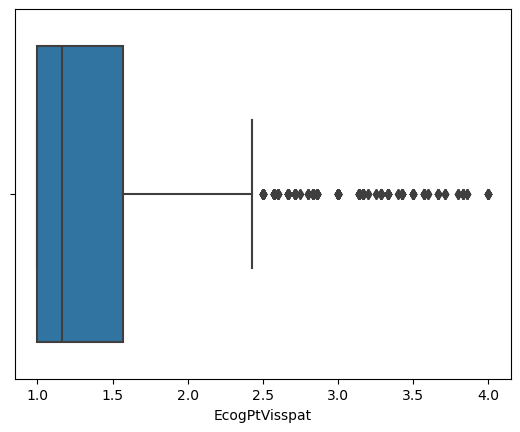

In [212]:
sns.boxplot(x=data['EcogPtVisspat'])
plt.show()

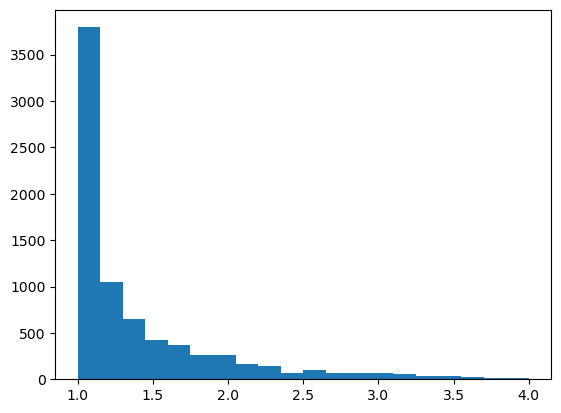

In [213]:
plt.hist(data['EcogPtVisspat'], bins=20)
plt.show()

In [214]:
# Median Imputation for EcogPtVisspat
median_columns = ['EcogPtVisspat'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Everyday Cognition (Ecog) - Planning component of Ecog Scales

The Everyday Cognition (Ecog) scales are designed to assess the impact of cognitive changes on daily functioning of the patient (Pt). These scales cover various cognitive domains, including memory, language, visuospatial abilities, and planning, reflecting how cognitive impairments might affect everyday tasks and activities. The scores for each of these domains range from 1.0 to 4.0, indicating the level of difficulty experienced in each area:

- **Score of 1.0:** Indicates no difficulty with tasks related to the specific cognitive domain, suggesting that the patient or their study partner perceives the patient's ability to perform daily activities that require this cognitive function as normal or unaffected.

- **Scores above 1.0 and up to 4.0:** Reflect increasing levels of difficulty or impairment in the corresponding domain. The scores are detailed as follows:
  - **Slight difficulty** might be indicated by scores just above 1.0, where the patient or their study partner begins to notice minor challenges in performing daily tasks that require specific cognitive functions.
  - **Moderate difficulty** is suggested by scores around the midpoint of the range (e.g., 2.5), indicating more significant challenges that might occasionally interfere with the completion of daily tasks or activities.
  - **Severe difficulty** is indicated by scores approaching 4.0, where the patient or their study partner reports that the patient frequently struggles with tasks requiring the specific cognitive skill, significantly impacting their daily life.

This scoring system allows for a nuanced assessment of how cognitive changes are perceived in the context of everyday living, providing valuable insights into the patient's quality of life and the practical implications of their cognitive health. It underscores the importance of considering both the patient's and caregivers' perspectives in evaluating the impact of cognitive impairments, facilitating a more comprehensive approach to care and intervention planning.

In [215]:
EcogPtPlan_column = data[['EcogPtPlan']]
unique_values = EcogPtPlan_column['EcogPtPlan'].unique()
print(unique_values)

[    nan 1.2     1.      2.8     1.4     2.6     1.8     2.      1.6
 2.2     2.4     3.2     1.25    4.      1.5     3.25    3.      1.75
 2.5     3.4     2.75    2.25    3.6     3.8     3.33333 2.33333 1.66667
 1.33333 3.66667 3.5     2.66667]


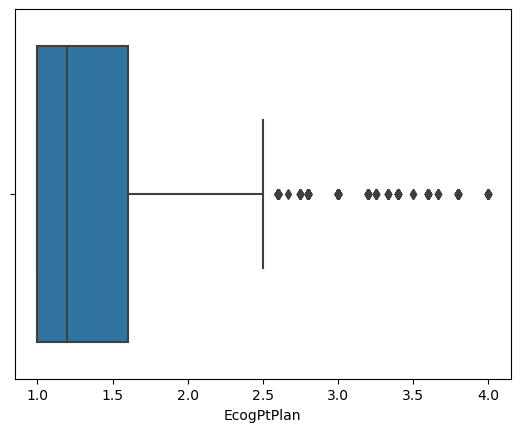

In [216]:
sns.boxplot(x=data['EcogPtPlan'])
plt.show()

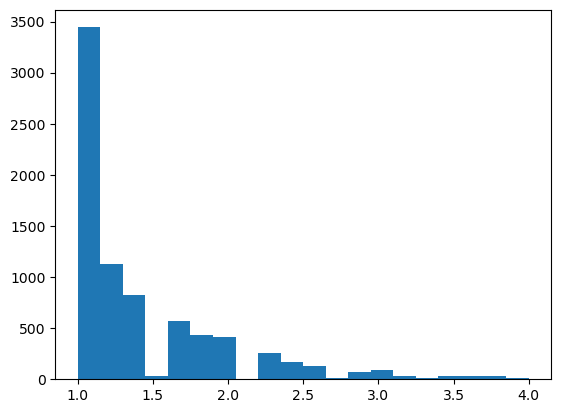

In [217]:
plt.hist(data['EcogPtPlan'], bins=20)
plt.show()

In [218]:
# Median Imputation for EcogPtPlan
median_columns = ['EcogPtPlan'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Everyday Cognition (Ecog) - Organisation component of Ecog Scales

The Everyday Cognition (Ecog) scales assess various domains of cognitive function as they manifest in daily activities, both from the perspective of the patient (Pt). The Ecog scales cover Memory, Language, Visuospatial abilities, Planning, and Organisation, among others, providing a comprehensive overview of an individual's cognitive performance in everyday situations.

### Scoring Range for Ecog Scales
- **Scores range from 1.0 to 4.0 across all scales.** This uniform scoring range facilitates a straightforward interpretation of results across different cognitive domains. Here's what the scores generally indicate:
  - **Score of 1.0:** Reflects normal or unimpaired function in the specific cognitive domain, indicating that the individual can perform tasks related to that domain without significant difficulty.
  - **Scores above 1.0 and up to 2.0:** May suggest mild difficulties or inconsistencies in performing tasks related to the cognitive domain being assessed. Individuals may sometimes require assistance or more time to complete these tasks.
  - **Scores above 2.0 and up to 3.0:** Indicate moderate impairment or difficulty in the specific domain, with individuals often requiring regular assistance or adaptations to perform related tasks.
  - **Scores above 3.0 and up to 4.0:** Suggest severe impairment in the domain, with individuals typically being unable to perform tasks related to the domain without substantial assistance.

### Application and Utility
- **For Clinicians and Researchers:** The Ecog scales are valuable for identifying specific areas of cognitive difficulty that might not be captured in a clinical setting, allowing for targeted interventions and support.
- **For Patients and Caregivers:** Understanding the specific domains of cognitive function that are affected can help in planning daily activities, managing expectations, and implementing practical support strategies.

### Comprehensive Cognitive Assessment
- The Ecog scales' comprehensive coverage of cognitive domains provides a nuanced picture of cognitive health and its impact on daily living. This makes it an essential tool for the assessment of neurodegenerative diseases like Alzheimer's, other forms of dementia, or any condition that may affect cognitive functioning.
- By including both patient and study partner perspectives, the Ecog scales offer a more holistic view of the individual's cognitive abilities, capturing discrepancies between self-perception and observed behavior that are informative for diagnosis and care planning.

In [219]:
EcogPtOrgan_column = data[['EcogPtOrgan']]
unique_values = EcogPtOrgan_column['EcogPtOrgan'].unique()
print(unique_values)

[    nan 1.66667 1.4     2.      1.16667 1.      1.33333 1.6     1.5
 1.83333 2.16667 2.33333 3.16667 2.5     2.25    2.66667 3.5     1.2
 3.83333 3.66667 1.75    3.33333 2.75    1.25    2.83333 1.8     2.2
 3.      3.2     2.6     3.6     3.4     3.75    2.4     3.25    4.
 2.8     3.8    ]


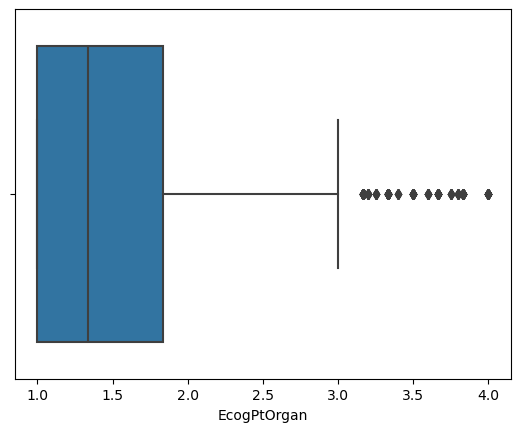

In [220]:
sns.boxplot(x=data['EcogPtOrgan'])
plt.show()

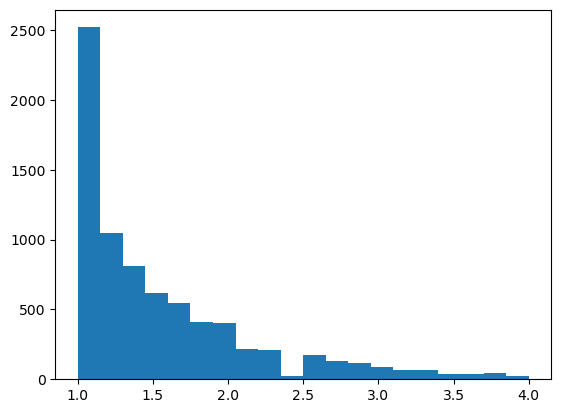

In [221]:
plt.hist(data['EcogPtOrgan'], bins=20)
plt.show()

In [222]:
# Median Imputation for EcogPtOrgan
median_columns = ['EcogPtOrgan'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Everyday Cognition (Ecog) - divided attention component of Ecog Scales

The Everyday Cognition (Ecog) scales assess the perceived cognitive functions in daily life, covering various domains including memory, language, visuospatial abilities, planning, organization, and divided attention. These scales are unique in that they provide insight into how cognitive changes impact of the individual (patient, Pt). The scores for each of these domains range from 1.0 to 4.0, reflecting the degree of difficulty the individual experiences or demonstrates in everyday cognitive tasks, with:

- **Score of 1.0:** Indicates no difficulty with tasks related to the specific cognitive domain being assessed. This score suggests that cognitive functions are intact and the individual is able to perform daily activities that rely on this cognitive domain without any perceived problems.

- **Score of 2.0:** Represents mild difficulty in performing tasks associated with the cognitive domain. This level may indicate slight changes or challenges that do not significantly impede daily functioning but are noticeable either by the patient or the study partner.

- **Score of 3.0:** Reflects moderate difficulty in the cognitive domain. At this level, the individual's cognitive changes are more pronounced and may start to affect their ability to perform daily activities independently or may require adaptations to manage these tasks.

- **Score of 4.0:** Denotes severe difficulty or inability to perform tasks related to the cognitive domain. Scores in this range suggest significant cognitive impairment that likely interferes with daily living and may necessitate assistance or intervention.

These Ecog scales are valuable for capturing the functional impact of cognitive changes from both the perspective of the affected individuals and their close observers, providing a comprehensive view of cognitive health. They are particularly useful in clinical settings for monitoring the progression of cognitive impairments and in research to understand the real-world impacts of cognitive decline and evaluate the efficacy of interventions aimed at improving or stabilizing cognitive functions.

In [224]:
EcogPtDivatt_column = data[['EcogPtDivatt']]
unique_values = EcogPtDivatt_column['EcogPtDivatt'].unique()
print(unique_values)

[    nan 1.5     1.25    2.      1.75    1.      2.75    2.25    3.5
 4.      3.      3.75    3.25    2.5     1.66667 2.66667 1.33333 2.33333
 3.66667 3.33333]


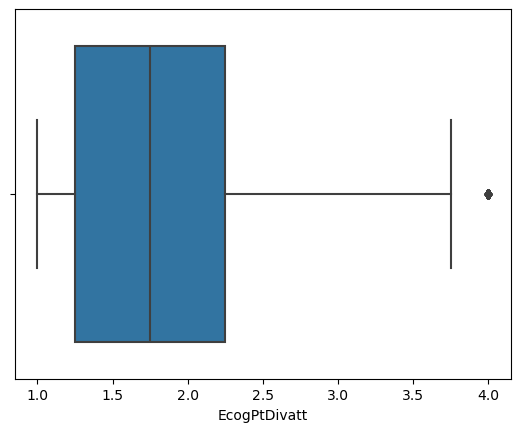

In [225]:
sns.boxplot(x=data['EcogPtDivatt'])
plt.show()

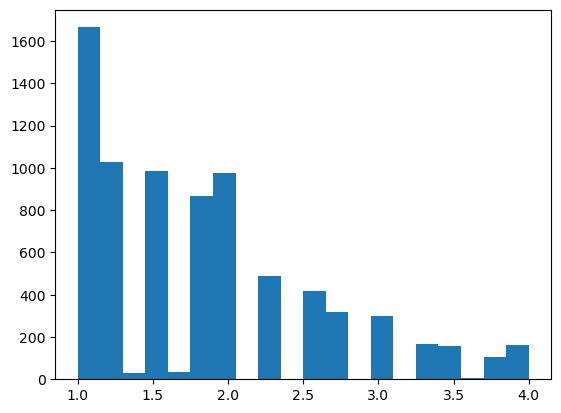

In [226]:
plt.hist(data['EcogPtDivatt'], bins=20)
plt.show()

In [227]:
# Median Imputation for EcogPtDivatt
median_columns = ['EcogPtDivatt'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

## Everyday Cognition (Ecog) - Overall Total Score (Total) component of Ecog Scales

The Everyday Cognition (Ecog) scales provide a comprehensive assessment of cognitive functions as they manifest in daily life, both from the perspective of the patient (Pt). These scales cover a range of cognitive domains, including Memory (Mem), Language (Lang), Visuospatial Abilities (Visspat), Planning (Plan), Organization (Organ), and Divided Attention (Divatt), culminating in an Overall Total Score (Total). Each of these domains and the overall score range from 1.0 to 4.0, with each score reflecting the degree of difficulty the individual experiences in that cognitive area:

- **Score of 1.0:** Indicates no difficulties, suggesting that the individual is functioning well in that cognitive domain or overall, as perceived by themselves or observed by the study partner.

- **Score of 2.0:** Suggests mild difficulties, indicating some challenges in cognitive functioning that might occasionally impact daily activities, but generally, the individual remains independent.

- **Score of 3.0:** Reflects moderate difficulties, pointing to noticeable challenges in cognitive functions that likely affect daily activities more regularly and might require some assistance or accommodation.

- **Score of 4.0:** Denotes severe difficulties, indicating that the individual has significant challenges in the cognitive domain assessed or overall, affecting daily life to a great extent and typically requiring assistance.

The Ecog scales are particularly useful for identifying and quantifying cognitive impairments that impact everyday living, aiding in the diagnosis and management of conditions that affect cognitive function, such as Alzheimer's disease and other dementias. By including both patient and study partner perspectives, the Ecog scales offer a more rounded view of the individual's cognitive abilities and their impact on daily activities, providing valuable information for clinical assessment, care planning, and the evaluation of treatment efficacy.

In [228]:
EcogPtTotal_column = data[['EcogPtTotal']]
unique_values = EcogPtTotal_column['EcogPtTotal'].unique()
print(unique_values)

[    nan 1.35897 1.28947 1.4359  1.25641 1.05128 1.12821 1.10256 1.30769
 1.86842 2.25641 1.84211 1.17949 2.35897 1.46154 1.53846 1.33333 1.23077
 1.66667 1.58974 1.29412 1.34211 1.02564 1.15385 1.71795 1.07692 2.10256
 1.      2.51282 1.92105 1.64103 1.28205 1.76923 1.97436 2.25    1.48718
 1.89744 2.61538 2.07692 1.20513 1.87179 1.69231 2.52778 1.41026 2.28571
 1.36842 1.79487 2.10811 2.38462 1.35135 2.12821 1.08108 1.62162 1.38889
 1.55882 2.05128 1.94872 1.5641  2.28205 1.40541 3.65789 1.82051 1.55556
 3.15385 2.68421 2.33333 1.92308 2.56522 2.92308 1.18182 2.4359  1.65714
 3.31579 1.51282 1.84615 1.10811 1.73684 2.74359 2.30769 2.2973  1.31579
 1.13889 1.39474 2.89744 1.83784 2.20513 1.38462 1.74359 1.72727 1.91892
 1.52941 1.26316 1.60526 1.52632 1.23684 3.10256 2.76923 1.65789 1.61538
 1.89474 2.08108 2.02564 2.41026 2.66667 2.      2.53846 2.87179 2.76316
 1.56757 1.94737 1.82857 2.15385 1.68421 1.83333 1.73529 1.5     1.71053
 2.28947 2.63158 2.94444 1.48649 1.27027 2.13514 3.

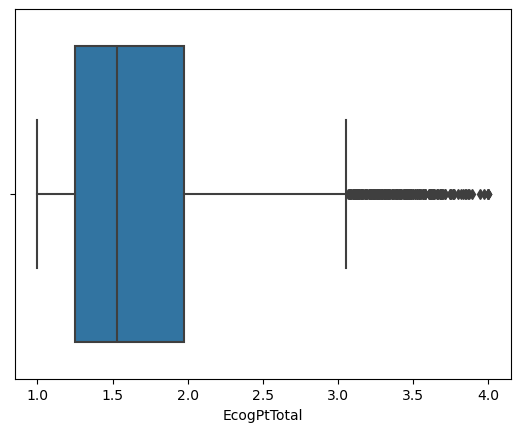

In [229]:
sns.boxplot(x=data['EcogPtTotal'])
plt.show()

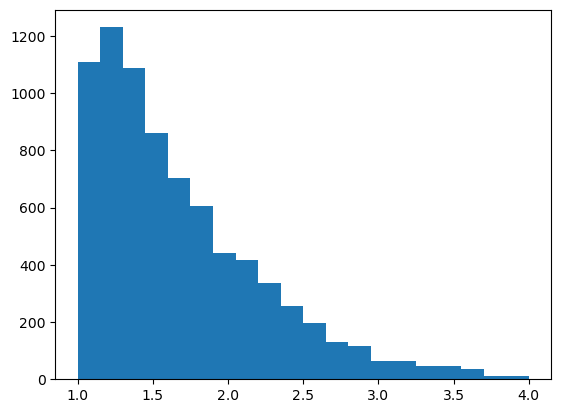

In [230]:
plt.hist(data['EcogPtTotal'], bins=20)
plt.show()

In [231]:
# Median Imputation for EcogPtTotal
median_columns = ['EcogPtTotal'] 
median_imputer = SimpleImputer(strategy='median')
data[median_columns] = median_imputer.fit_transform(data[median_columns])

# Handling Missing Values in the Target Variable (DX)

In [252]:
# creating data backup
data = data_copy.copy()

# Separate the dataset into rows with known and unknown 'DX' values
known_dx = data[data['DX'].notna()]
unknown_dx = data[data['DX'].isna()]


#  feature list according to the dataset
features = [ 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG', 'PIB', 'AV45', 'FBB', 'ABETA', 'TAU', 'PTAU', 
    'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'LDELTOTAL',
'DIGITSCOR', 'TRABSCOR', 'FAQ', 'MOCA', 'EcogPtMem', 'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt', 'EcogPtTotal' ]  # categorical and numerical features
target = 'DX'

# Preprocessing: Fill missing values in numerical features with median and encode categorical features
numerical_features = known_dx[features].select_dtypes(include=[np.number]).columns.tolist()
categorical_features = list(set(features) - set(numerical_features))

# One-hot encode categorical data
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical_known = encoder.fit_transform(known_dx[categorical_features])
encoded_categorical_unknown = encoder.transform(unknown_dx[categorical_features])

# Combine numerical and encoded categorical features back into a DataFrame
X_known = np.hstack([known_dx[numerical_features].values, encoded_categorical_known])
X_unknown = np.hstack([unknown_dx[numerical_features].values, encoded_categorical_unknown])

# Split the known_dx dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_known, known_dx[target], test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict the 'DX' values for the rows where 'DX' is missing
predicted_dx = rf_classifier.predict(X_unknown)

# Fill in the missing 'DX' values in the original dataset
unknown_dx[target] = predicted_dx

# Combine the known and newly imputed data back into one DataFrame
data = pd.concat([known_dx, unknown_dx])

C:\Users\a040910m\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\a040910m\AppData\Local\Temp\ipykernel_9608\2751941110.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_dx[target] = predicted_dx


## Checking for Missing Values

In [253]:
data['DX'].isnull().sum()

0

In [254]:
# Count the number of missing values in each column again
missing_values_count = data.isnull().sum()

# Display the count of missing values for each column
missing_values_count

RID             0
COLPROT         0
ORIGPROT        0
PTID            0
SITE            0
               ..
Years_bl        0
Month_bl        0
Month           0
M               0
update_stamp    0
Length: 116, dtype: int64

## Handling Outliers

### Checking Outliers

Computing the Interquartile Range (IQR) by subtracting the first quartile (Q1) from the third quartile (Q3) provides a robust measure of a dataset's statistical dispersion, focusing on the middle 50% of data. This method is highly valued for its resilience to outliers, as it excludes the most extreme values which can skew measures of variability. The IQR is essential for identifying outliers by establishing a range outside of which data points are considered unusually high or low, thereby enabling a more accurate analysis of the data's central tendency and spread. By offering a clear summary of the distribution without being influenced by outliers, the IQR is crucial for exploratory data analysis, facilitating the comparison of distributions across different datasets in a fair and unaffected manner.

In [255]:

# Determine outliers using the IQR method for numeric columns
outlier_info = {}

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the number of outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    
    if outlier_count > 0:
        outlier_info[column] = outlier_count

outlier_info


{'SITE': 420,
 'AGE': 5,
 'PTEDUCAT': 65,
 'FDG': 3693,
 'PIB': 222,
 'AV45': 3078,
 'FBB': 513,
 'ABETA': 794,
 'TAU': 791,
 'PTAU': 792,
 'CDRSB': 1891,
 'ADAS11': 1971,
 'ADAS13': 1665,
 'MMSE': 1750,
 'RAVLT_immediate': 1576,
 'RAVLT_learning': 1138,
 'RAVLT_forgetting': 763,
 'RAVLT_perc_forgetting': 61,
 'LDELTOTAL': 5364,
 'DIGITSCOR': 3660,
 'TRABSCOR': 2413,
 'FAQ': 2373,
 'MOCA': 6614,
 'EcogPtMem': 7282,
 'EcogPtLang': 4922,
 'EcogPtVisspat': 7204,
 'EcogPtPlan': 6662,
 'EcogPtOrgan': 6844,
 'EcogPtDivatt': 6834,
 'EcogPtTotal': 7710,
 'EcogSPLang': 266,
 'EcogSPVisspat': 739,
 'EcogSPPlan': 614,
 'IMAGEUID': 1702,
 'Ventricles': 4712,
 'Hippocampus': 6290,
 'WholeBrain': 4023,
 'Entorhinal': 7315,
 'Fusiform': 7483,
 'MidTemp': 7520,
 'ICV': 3467,
 'mPACCdigit': 195,
 'mPACCtrailsB': 224,
 'CDRSB_bl': 406,
 'ADAS11_bl': 534,
 'ADAS13_bl': 259,
 'MMSE_bl': 37,
 'RAVLT_learning_bl': 7,
 'RAVLT_forgetting_bl': 389,
 'RAVLT_perc_forgetting_bl': 23,
 'DIGITSCOR_bl': 98,
 'TRABSC

### Handling the Outliers

In [256]:

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values below the lower bound to the lower bound value
    # and above the upper bound to the upper bound value
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)


### Check Outliers again for comfirmation

In [257]:
# Determine outliers using the IQR method for numeric columns
outlier_info = {}

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the number of outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    
    if outlier_count > 0:
        outlier_info[column] = outlier_count

outlier_info

{}

# Feature Engineering

## Removing Unwanted Features

In [258]:
data.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11.0,bl,2005-09-08,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
1,3,ADNI1,ADNI1,011_S_0003,11.0,bl,2005-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
2,3,ADNI1,ADNI1,011_S_0003,11.0,m06,2006-03-13,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,2023-07-07 04:59:40.0
3,3,ADNI1,ADNI1,011_S_0003,11.0,m12,2006-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.999316,11.96720,12,12,2023-07-07 04:59:40.0
4,3,ADNI1,ADNI1,011_S_0003,11.0,m24,2007-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,1.998630,23.93440,24,24,2023-07-07 04:59:40.0


In [259]:
# List of columns to be removed
columns_to_remove = ['RID', 'COLPROT', 'ORIGPROT', 'PTID', 'SITE', 'VISCODE', 'EXAMDATE', 'DX_bl',
                     'PTETHCAT', 'FLDSTRENG', 'FSVERSION', 'IMAGEUID', 'mPACCdigit', 'mPACCtrailsB',
                     'EXAMDATE_bl', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'ADASQ4_bl', 'MMSE_bl',
                     'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_forgetting_bl', 
                     'RAVLT_perc_forgetting_bl', 'LDELTOTAL_BL', 'DIGITSCOR_bl', 'TRABSCOR_bl', 'FAQ_bl',
                     'mPACCdigit_bl', 'mPACCtrailsB_bl', 'FLDSTRENG_bl', 'FSVERSION_bl', 'IMAGEUID_bl',
                     'Ventricles_bl', 'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl', 'Fusiform_bl',
                     'MidTemp_bl', 'ICV_bl', 'MOCA_bl', 'EcogPtMem_bl', 'EcogPtLang_bl', 'EcogPtVisspat_bl',
                     'EcogPtPlan_bl', 'EcogPtOrgan_bl', 'EcogPtDivatt_bl', 'EcogPtTotal_bl', 'EcogSPMem_bl',
                     'EcogSPLang_bl', 'EcogSPVisspat_bl', 'EcogSPPlan_bl', 'EcogSPOrgan_bl', 'EcogSPDivatt_bl',
                     'EcogSPTotal_bl', 'ABETA_bl', 'TAU_bl', 'PTAU_bl', 'FDG_bl', 'PIB_bl', 'AV45_bl', 'FBB_bl',
                     'Years_bl', 'Month_bl', 'Month', 'M', 'update_stamp', 'EcogSPMem',	'EcogSPLang',	
                     'EcogSPVisspat',	'EcogSPPlan',	'EcogSPOrgan',	'EcogSPDivatt',	'EcogSPTotal']

# Remove the specified columns from the dataset
data = data.drop(columns=columns_to_remove)



In [260]:
data.head()

,AGE,PTGENDER,PTEDUCAT,PTRACCAT,PTMARRY,APOE4,FDG,PIB,AV45,FBB,...,EcogPtDivatt,EcogPtTotal,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX
0,74.3,Male,16,White,Married,0.0,1.175624,1.85,1.1068,1.175212,...,1.75,1.52632,50633.0,7344.75,1104451.0,3725.097986,17001.0,19856.0,1667775.0,CN
1,81.3,Male,18,White,Married,1.0,1.175624,1.85,1.1068,1.175212,...,1.75,1.52632,50633.0,6404.35,1104451.0,3458.170024,17001.0,19064.0,1667775.0,Dementia
2,81.3,Male,18,White,Married,1.0,1.175624,1.85,1.1068,1.175212,...,1.75,1.52632,50633.0,6404.35,1100060.0,3458.170024,17001.0,19064.0,1667775.0,Dementia
3,81.3,Male,18,White,Married,1.0,1.175624,1.85,1.1068,1.175212,...,1.75,1.52632,50633.0,6404.35,1095640.0,3458.170024,17001.0,19064.0,1667775.0,Dementia
4,81.3,Male,18,White,Married,1.0,1.175624,1.85,1.1068,1.175212,...,1.75,1.52632,50633.0,6404.35,1088560.0,3458.170024,17001.0,19064.0,1667775.0,Dementia


### Drop Duplicate Rows

In [261]:
# 'data' is our DataFrame
data_cleaned = data.drop_duplicates()

In [262]:
data.head()

,AGE,PTGENDER,PTEDUCAT,PTRACCAT,PTMARRY,APOE4,FDG,PIB,AV45,FBB,...,EcogPtDivatt,EcogPtTotal,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX
0,74.3,Male,16,White,Married,0.0,1.175624,1.85,1.1068,1.175212,...,1.75,1.52632,50633.0,7344.75,1104451.0,3725.097986,17001.0,19856.0,1667775.0,CN
1,81.3,Male,18,White,Married,1.0,1.175624,1.85,1.1068,1.175212,...,1.75,1.52632,50633.0,6404.35,1104451.0,3458.170024,17001.0,19064.0,1667775.0,Dementia
2,81.3,Male,18,White,Married,1.0,1.175624,1.85,1.1068,1.175212,...,1.75,1.52632,50633.0,6404.35,1100060.0,3458.170024,17001.0,19064.0,1667775.0,Dementia
3,81.3,Male,18,White,Married,1.0,1.175624,1.85,1.1068,1.175212,...,1.75,1.52632,50633.0,6404.35,1095640.0,3458.170024,17001.0,19064.0,1667775.0,Dementia
4,81.3,Male,18,White,Married,1.0,1.175624,1.85,1.1068,1.175212,...,1.75,1.52632,50633.0,6404.35,1088560.0,3458.170024,17001.0,19064.0,1667775.0,Dementia


## Data Encoding; One Hot Encoding Categorical Data

One-Hot Encoding: OneHotEncoder from sklearn.preprocessing was utilised to transform categorical variables into binary columns, with each category represented by a separate column. This method was chosen for its ability to handle nominal categories without introducing ordinal assumptions.

In [263]:
# Identify categorical columns, excluding 'DX'
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns.remove('DX')  # Exclude the 'DX' column from the list of columns to encode

# Initialise the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='if_binary', handle_unknown='ignore')

# Fit and transform the categorical data
encoded_categorical_data = encoder.fit_transform(data[categorical_columns])

# Create a DataFrame with the encoded data
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_categorical_data, columns=encoded_columns)

# Drop the original categorical columns from the data and join with the encoded_df
data = data.drop(columns=categorical_columns).join(encoded_df)


C:\Users\a040910m\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## LabelEncoding our Target Variable (DX)

Custom Encoding: To align the encoding with the progression stages of Alzheimer's disease (from normal cognition to dementia), a custom mapping was applied to reorder the labels as follows: {'CN': 0, 'MCI': 1, 'Dementia': 2}. This reordering ensures that the numerical encoding reflects the ordinal nature of the diagnostic categories.

In [264]:
# Check the unique values contained in the 'DX' column

unique_dx_values = data['DX'].unique()

unique_dx_values

array(['CN', 'Dementia', 'MCI'], dtype=object)

In [265]:
# Custom mapping for the 'DX' column
custom_mapping = {'CN': 0, 'Dementia': 2, 'MCI': 1}

# Replace the 'DX' column values based on the custom mapping
data['DX'] = data['DX'].replace(custom_mapping)

In [266]:

# Check the unique values contained in the 'DX' column

unique_dx_values = data['DX'].unique()

unique_dx_values

array([0, 2, 1], dtype=int64)

### Saving a copy of the Preprocessed data in the stortage

In [267]:
data.to_csv('OneDrive - Staffordshire University/Chika Dissertation/data/adni/Individual dataset/cleaned_dataset.csv', index=False)

# Training Ensemble Learning Model for Alzheimer Disease Detection

In [13]:
# 'X' and 'y' are your features and target variable respectively
X = data.drop('DX', axis=1)  # 'DX' is the target variable
y = data['DX']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Defining the meta-model
meta_model = LogisticRegression()

# Creating the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Training the stacking classifier
stacking_clf.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = stacking_clf.predict(X_test)
y_prob = stacking_clf.predict_proba(X_test)  # For ROC AUC calculation


## Model Evaluation

In [15]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# ROC AUC calculation, accommodating for multiclass classification
if len(y.unique()) > 2:  # Multiclass classification
    roc_auc = roc_auc_score(pd.get_dummies(y_test), y_prob, multi_class='ovr')
else:  # Binary classification
    roc_auc = roc_auc_score(y_test, y_prob[:, 1])

conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.8916
Precision: 0.8916
Recall: 0.8773
F1 Score: 0.8840
ROC AUC: 0.9709
Confusion Matrix:
[[1011  115    2]
 [  82 1471   62]
 [   0   95  447]]


## Model Result

1. **Accuracy:**
   - This metric, representing the overall correctness of the model across all classes, indicated a high level of performance, with approximately 89.19% of the predictions being accurate. High accuracy is crucial for clinical applications, suggesting the model's reliability in general diagnostic contexts.
   - Formula: $$ ( \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} ) $$
   - In the result, the accuracy is **0.8919**, indicating that approximately **89.19%** of predictions made by the Alzheimer's disease detection model were correct.

2. **Precision:**
   - Precision measures the model's ability to return relevant results, with a score of 0.8920 indicating that 89.20% of the model's positive predictions were correct. This high precision is particularly valuable in medical diagnostics, where the cost of false positives can be high.
   - Formula: $$( \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} )$$
   - In the result, precision is **0.8920**, suggesting that when the model predicts a positive class (indicating Alzheimer's disease), it is correct approximately **89.20%** of the time.

3. **Recall:**
   - Also known as sensitivity, recall assesses the model's ability to identify all actual positives. A recall of 0.8774 means that the model correctly identified 87.74% of all actual cases, an essential aspect of Alzheimer's Disease detection where missing a diagnosis can have significant implications.
   - Formula: $$( \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} )$$
   - Recall is **0.8774**, indicating that the model correctly identified approximately 87.74% of all actual positive instances of Alzheimer's disease.

4. **F1 Score:**
   - The F1 score, which balances precision and recall, was 0.8842. This indicates a strong harmonic mean between precision and recall, suggesting that the model effectively balances the importance of both metrics.
   - Formula: $$( F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} )$$
   - The F1 score in the result is **0.8842**, indicating a good balance between precision and recall.

5. **ROC AUC:**
   - The ROC AUC (Receiver Operating Characteristic Area Under Curve) measures the model's ability to discriminate between positive and negative classes across different threshold settings. The area under the receiver operating characteristic curve, a comprehensive measure of the model's ability to discriminate between classes, was remarkably high at 0.9710. This underscores the model's excellent capability in distinguishing between different stages of Alzheimer's Disease, from normal aging to early and late stages of the disease.
   - It provides a single value indicating the overall performance of the model.
   - The ROC AUC ranges from 0 to 1, where a higher value indicates better performance.
   - In the result, the ROC AUC is **0.9710**, suggesting that the model has a high degree of discrimination ability for detecting Alzheimer's disease.

6. **Confusion Matrix:**
   - The confusion matrix provides a tabular summary of the model's predictions compared to the actual class labels.
   - It shows the number of true positive, true negative, false positive, and false negative predictions for each class.
   - The provided confusion matrix indicates the model's performance across different classes of Alzheimer's disease detection.

# Model Validation

## Cross Validation

In [16]:
# Separate features and target
X = data.drop('DX', axis=1)  # Features
y = data['DX']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)


# Define the K-Fold cross-validator (k=10)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform K-Fold CV and calculate accuracy
cv_results = cross_val_score(rf_classifier, X, y, cv=kfold, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_accuracy = np.mean(cv_results)
std_cv_accuracy = np.std(cv_results)

print(f"Mean CV Accuracy: {mean_cv_accuracy:.2f}")
print(f"Standard Deviation of CV Accuracy: {std_cv_accuracy:.2f}")


Mean CV Accuracy: 0.90
Standard Deviation of CV Accuracy: 0.01


## External Validation

In [3]:
# Load your dataset
datax = pd.read_csv(r'C:\Users\a040910m\OneDrive - Staffordshire University\Chika Dissertation\Artefact\external.csv')

In [5]:
# 'X' and 'y' are your features and target variable respectively
X = datax.drop(['DX1','DX','PTGENDER_Female'], axis=1)  # 'DX' is the target variable
y = datax['DX']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Defining the meta-model
meta_model = LogisticRegression()

# Creating the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Training the stacking classifier
stacking_clf.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = stacking_clf.predict(X_test)
y_prob = stacking_clf.predict_proba(X_test)  # For ROC AUC calculation

# Evaluation metrics
acuracy = accuracy_score(y_test, y_pred)
precsion = precision_score(y_test, y_pred, average='macro')
recal = recall_score(y_test, y_pred, average='macro')
ff1 = f1_score(y_test, y_pred, average='macro')

# ROC AUC calculation, accommodating for multiclass classification
if len(y.unique()) > 2:  # Multiclass classification
    ruc_auc = roc_auc_score(pd.get_dummies(y_test), y_prob, multi_class='ovr')
else:  # Binary classification
    ruc_auc = roc_auc_score(y_test, y_prob[:, 1])

conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 74.0643
Precision: 70.0000
Recall: 71.3450
F1 Score: 73.7432
ROC AUC: 79.8611
Confusion Matrix:
[[ 425  665   38]
 [ 281 1270   64]
 [ 102  359   81]]


## Critical Features

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# Load your dataset
data = pd.read_csv(r'C:\Users\a040910m\OneDrive - Staffordshire University\Chika Dissertation\Artefact\cleaned_dataset.csv')

X = data.drop('DX', axis=1)  # Features
y = data['DX']  # Target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Extract the Random Forest base estimator
rf_base_estimator = stacking_clf.named_estimators_['rf']

# Get the feature importances from the Random Forest
feature_importances = rf_base_estimator.feature_importances_

# Identify the indices of the top features
num_top_features = 10  # for example, select top 5
top_feature_indices = np.argsort(feature_importances)[-num_top_features:]

# Extract the top features from the training and testing sets
X_train_top = X_train.iloc[:, top_feature_indices]
X_test_top = X_test.iloc[:, top_feature_indices]


In [10]:
import numpy as np
import pandas as pd

# Assuming `feature_importances` is an array of importances from your model
# and `feature_names` is a list of names corresponding to each feature
feature_importances = np.array(rf_base_estimator.feature_importances_)
feature_names = X_train.columns

# Create a pandas DataFrame for easy sorting and visualization
feature_ranking = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame based on 'Importance' in descending order
feature_ranking = feature_ranking.sort_values('Importance', ascending=False)

# Reset the index to have a proper ranking
feature_ranking.reset_index(drop=True, inplace=True)

# Add a ranking column
feature_ranking['Rank'] = feature_ranking.index + 1

# Display the feature ranking
print(feature_ranking)


                       Feature  Importance  Rank
0                        CDRSB    0.223433     1
1                          FAQ    0.092683     2
2                          AGE    0.083550     3
3                     PTEDUCAT    0.078849     4
4                       ADAS13    0.059704     5
5                       ADAS11    0.048069     6
6                    LDELTOTAL    0.044616     7
7                         MMSE    0.040230     8
8                       ADASQ4    0.035618     9
9              RAVLT_immediate    0.034418    10
10       RAVLT_perc_forgetting    0.028259    11
11                       APOE4    0.026249    12
12                    TRABSCOR    0.022249    13
13                  WholeBrain    0.021211    14
14              RAVLT_learning    0.019186    15
15                         ICV    0.018163    16
16                  EcogPtLang    0.016008    17
17                  Ventricles    0.015500    18
18                   EcogPtMem    0.013804    19
19            RAVLT_

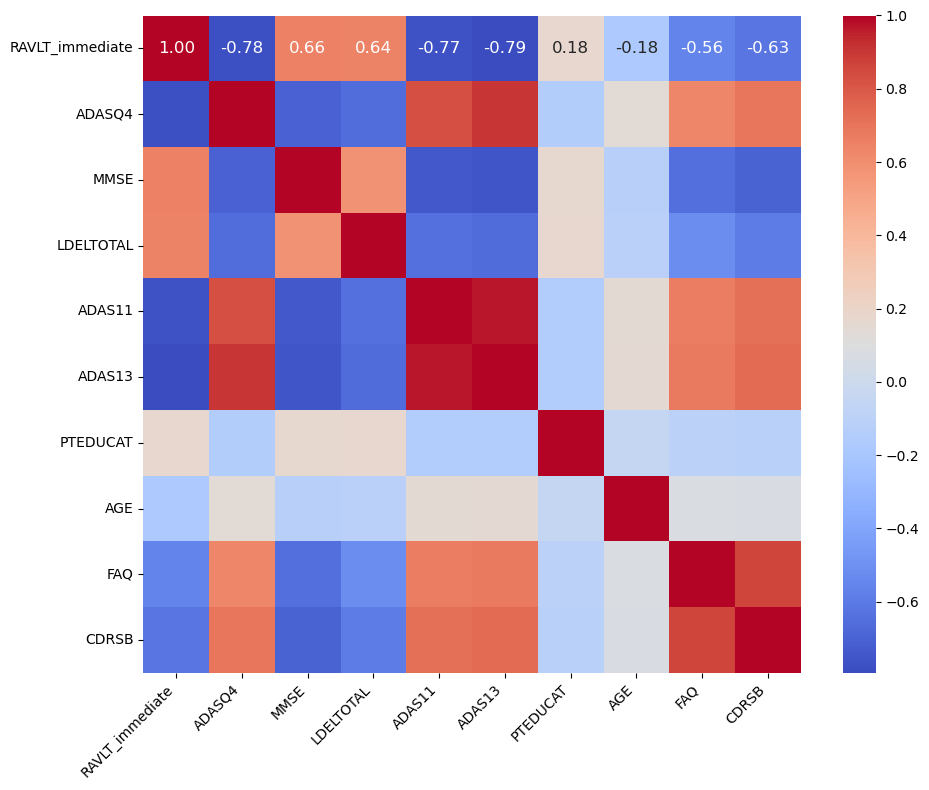

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the dataframe of critical features
corr_matrix = X_train_top.corr()

# Initialize a matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap in seaborn
sns.heatmap(corr_matrix, 
            annot=True,      # If you want to display the correlation coefficients
            cmap='coolwarm', # Color map for the heatmap
            cbar=True,       # Display a color bar
            square=True,     # Ensure the cells are square-shaped
            fmt='.2f',       # Formatting of the correlation values
            annot_kws={'size': 12})  # Font size for the annotations

# Adjust the plot to make sure it's not too cramped
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


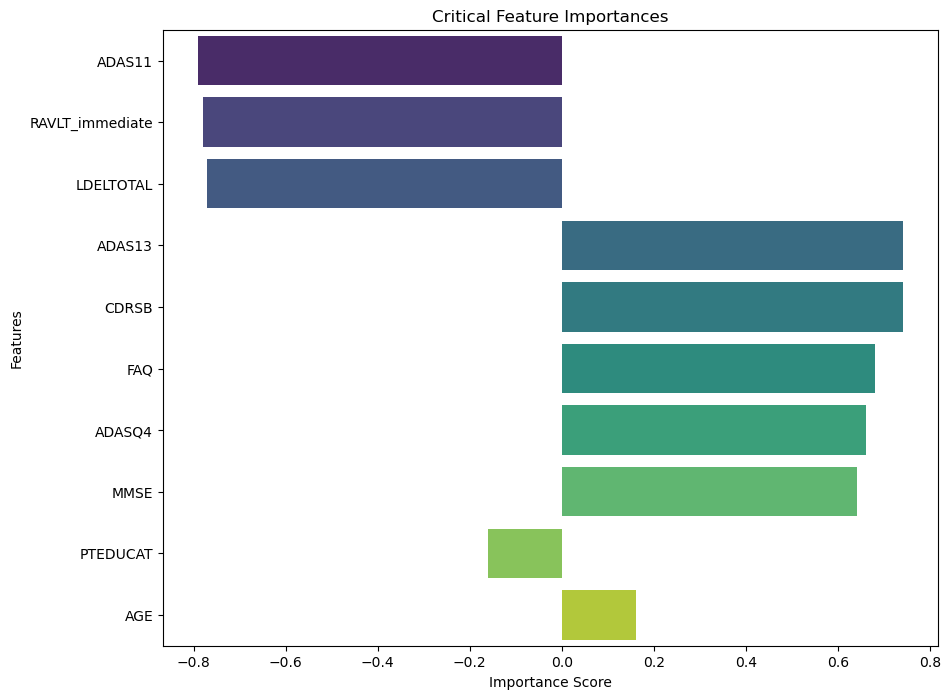

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataframe of critical features and their importance scores
# Replace this with your actual dataframe
df = pd.DataFrame({
    'Feature': ['ADAS13', 'PTEDUCAT', 'AGE', 'FAQ', 'CDRSB', 'RAVLT_immediate', 'ADASQ4', 'MMSE', 'LDELTOTAL', 'ADAS11'],
    'Importance': [0.74, -0.16, 0.16, 0.68, 0.74, -0.78, 0.66, 0.64, -0.77, -0.79]
})

# Sort the dataframe by the absolute values of importance scores in descending order
df_sorted = df.assign(AbsImportance=df['Importance'].abs()).sort_values('AbsImportance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_sorted, palette='viridis')
plt.title('Critical Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
